<a href="https://colab.research.google.com/github/moshekranc-git/pythonplayground/blob/master/santandar1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd

from collections import Counter

# File system manangement
import os

# Suppress warnings
#import warnings
#warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

Training data shape:  (200000, 202)


Head
    ID_code  target    var_0   var_1  ...  var_196  var_197  var_198  var_199
0  train_0       0   8.9255 -6.7863  ...   7.8784   8.5635  12.7803  -1.0914
1  train_1       0  11.5006 -4.1473  ...   8.1267   8.7889  18.3560   1.9518
2  train_2       0   8.6093 -2.7457  ...  -6.5213   8.2675  14.7222   0.3965
3  train_3       0  11.0604 -2.1518  ...  -2.9275  10.2922  17.9697  -8.9996
4  train_4       0   9.8369 -1.4834  ...   3.9267   9.5031  17.9974  -8.8104

[5 rows x 202 columns]


dtypes
 ID_code     object
target       int64
var_0      float64
var_1      float64
var_2      float64
            ...   
var_195    float64
var_196    float64
var_197    float64
var_198    float64
var_199    float64
Length: 202, dtype: object


dtype value counts
 float64    200
object       1
int64        1
dtype: int64


Describe


target:

Class=0, Count=179902, Percentage=89.951%
Class=1, Count=20098, Percentage=10.049%


float64    200
object       1
int64        1
dtype: int64

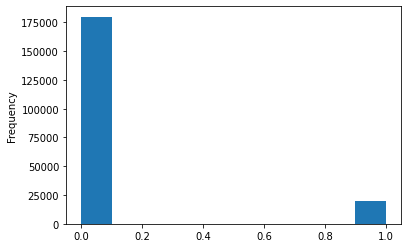

In [28]:
# Training data
app_train = pd.read_csv('train.csv')
print('Training data shape: ', app_train.shape)
print('\n\nHead\n', app_train.head())
print('\n\ndtypes\n', app_train.dtypes)
print('\n\ndtype value counts\n', app_train.dtypes.value_counts())
print('\n\nDescribe\n')
app_train.describe()

# summarize the class distribution
print("\ntarget:\n")
target = app_train['target'].values
counter = Counter(target)
for k,v in counter.items():
    per = v / len(target) * 100
    print('Class=%s, Count=%d, Percentage=%.3f%%' % (k, v, per))
app_train['target'].astype(int).plot.hist();

# Number of each type of column
app_train.dtypes.value_counts()

very unbalanced! we will have to do something to balance it.

which field is the categorical field?

In [34]:
# select categorical features
  cat_columns = app_train.select_dtypes(include=['object', 'bool']).columns
  print('cat_columns =', cat_columns, '\n')

  # select numerical features
  num_columns = app_train.select_dtypes(include=['int64', 'float64']).columns
  print('num_columns =', num_columns, '\n')


cat_columns = Index(['ID_code'], dtype='object') 

num_columns = Index(['target', 'var_0', 'var_1', 'var_2', 'var_3', 'var_4', 'var_5', 'var_6',
       'var_7', 'var_8',
       ...
       'var_190', 'var_191', 'var_192', 'var_193', 'var_194', 'var_195',
       'var_196', 'var_197', 'var_198', 'var_199'],
      dtype='object', length=201) 



it's really an index, starting from 0, disguised as a category by the preceding text 'test_'

In [0]:
# Function to calculate missing values by column 
def missing_values_table(df):
  # Total missing values
  mis_val = df.isnull().sum()
        
  # Percentage of missing values
  mis_val_percent = 100 * df.isnull().sum() / len(df)
        
  # Make a table with the results
  mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
  # Rename the columns
  mis_val_table_ren_columns = mis_val_table.rename(
  columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
  # Sort the table by percentage of missing descending
  mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
            '% of Total Values', ascending=False).round(1)
        
  # Print some summary information
  print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
  # Return the dataframe with missing information
  return mis_val_table_ren_columns

In [31]:
# Missing values statistics
missing_values = missing_values_table(app_train)
missing_values.head(100)

Your selected dataframe has 202 columns.
There are 0 columns that have missing values.


Empty DataFrame
Columns: [Missing Values, % of Total Values]
Index: []

only one missing value for each of 105 columns. maybe a single row that is half blank?


In [32]:
null_columns=app_train.columns[app_train.isnull().any()]
print(app_train[app_train.isnull().any(axis=1)][null_columns].head())

Empty DataFrame
Columns: []
Index: []


so it is one row that has all the blanks - row 6947 - should be deleted


 target 



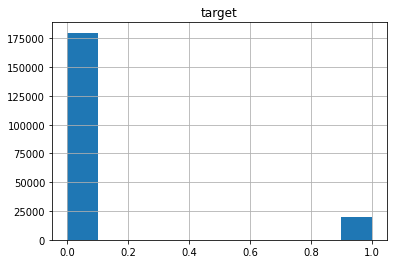


 var_0 



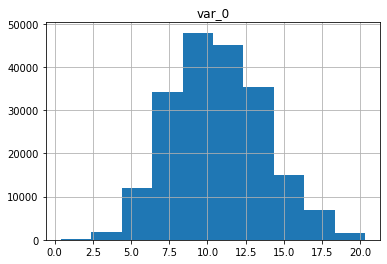


 var_1 



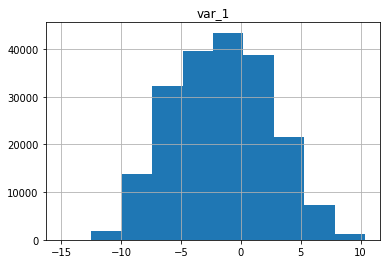


 var_2 



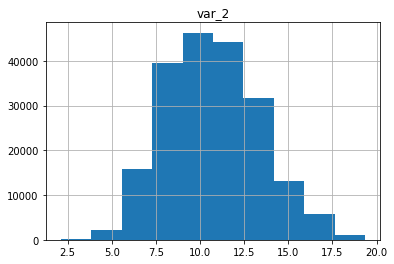


 var_3 



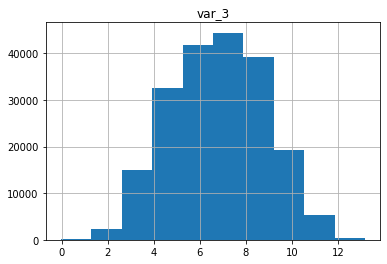


 var_4 



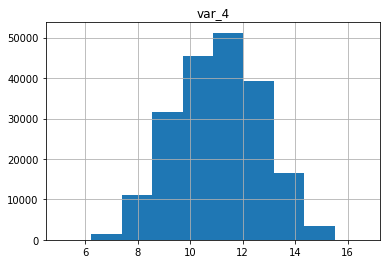


 var_5 



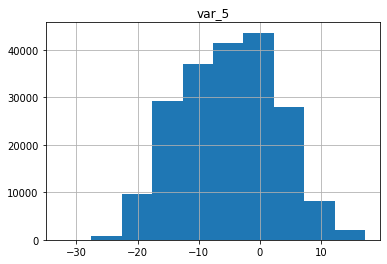


 var_6 



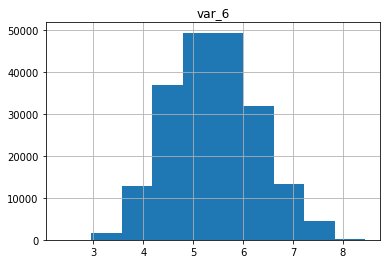


 var_7 



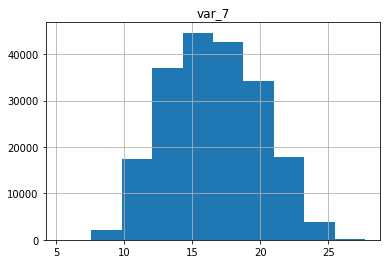


 var_8 



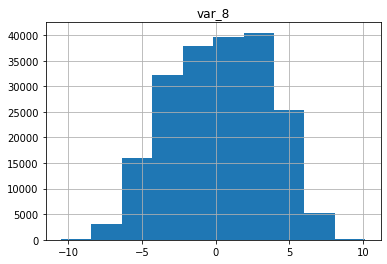


 var_9 



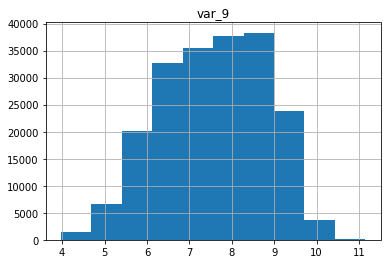


 var_10 



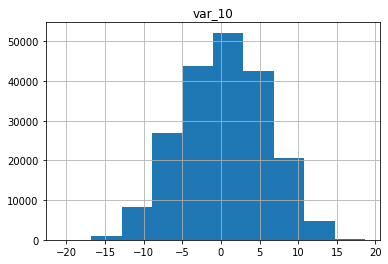


 var_11 



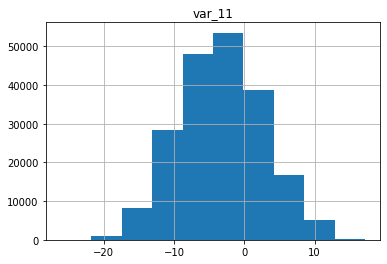


 var_12 



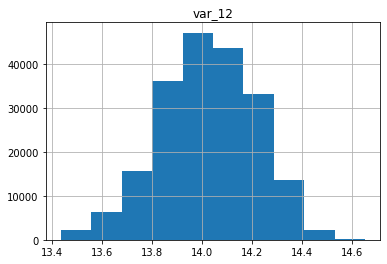


 var_13 



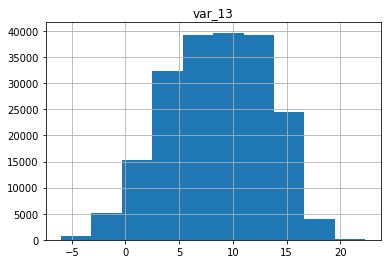


 var_14 



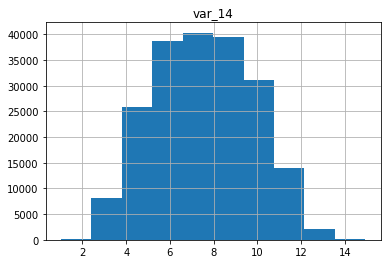


 var_15 



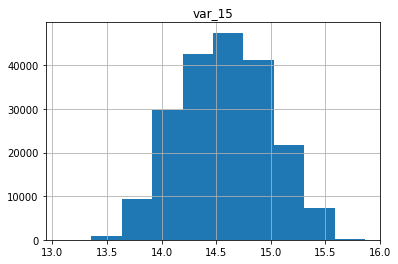


 var_16 



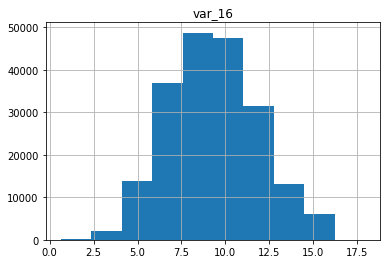


 var_17 



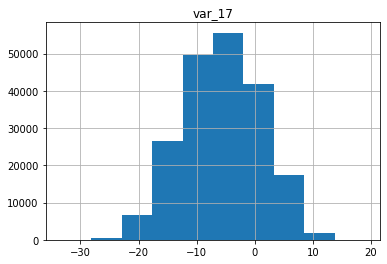


 var_18 



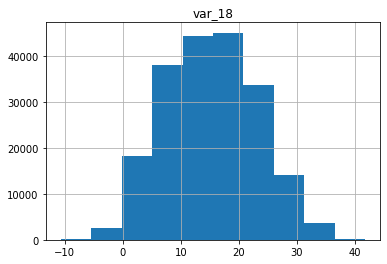


 var_19 



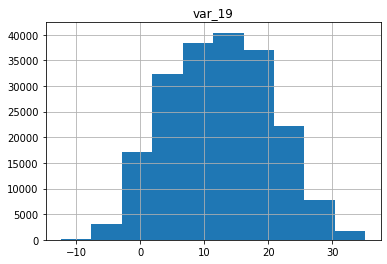


 var_20 



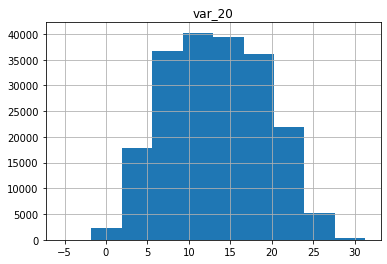


 var_21 



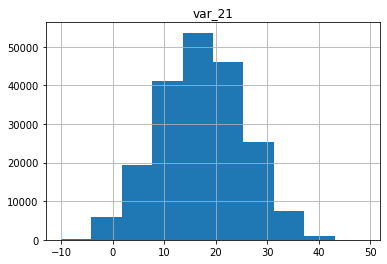


 var_22 



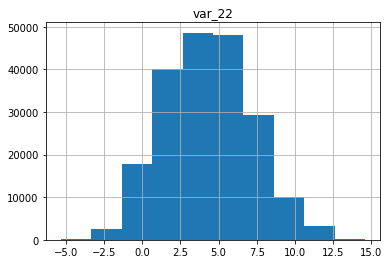


 var_23 



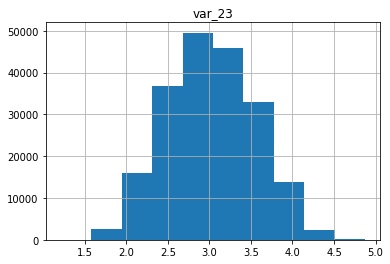


 var_24 



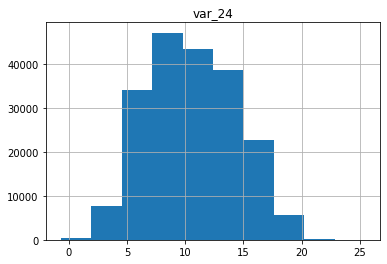


 var_25 



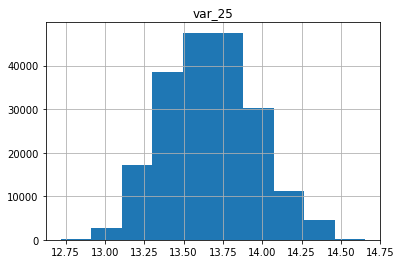


 var_26 



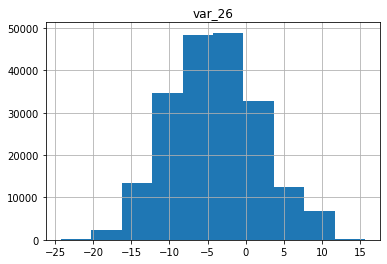


 var_27 



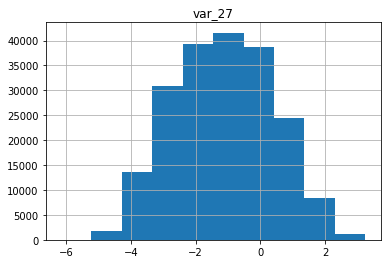


 var_28 



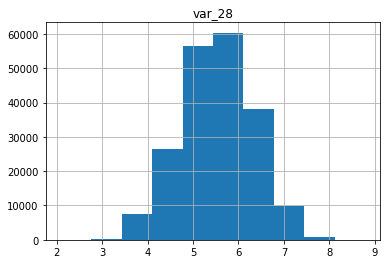


 var_29 



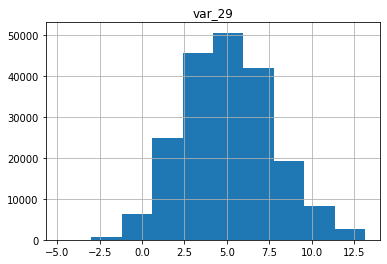


 var_30 



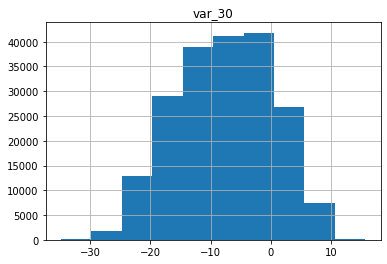


 var_31 



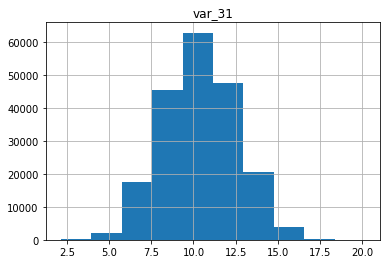


 var_32 



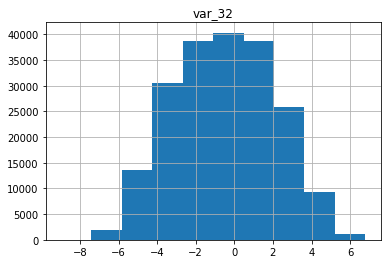


 var_33 



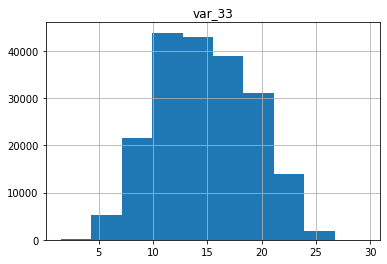


 var_34 



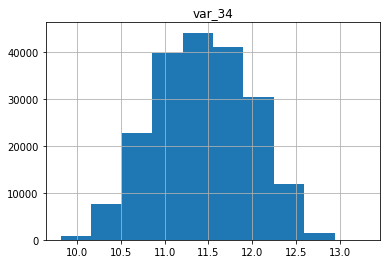


 var_35 



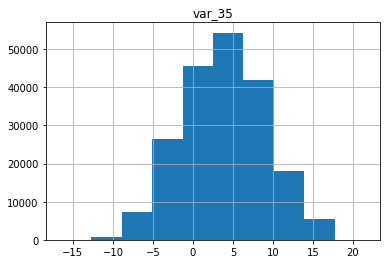


 var_36 



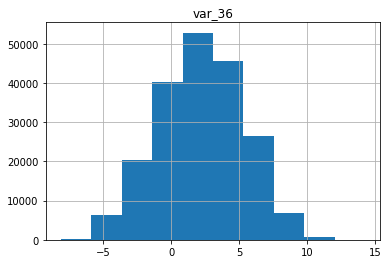


 var_37 



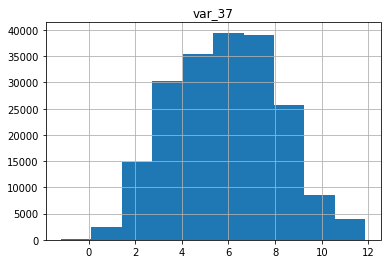


 var_38 



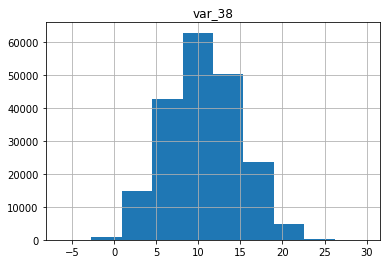


 var_39 



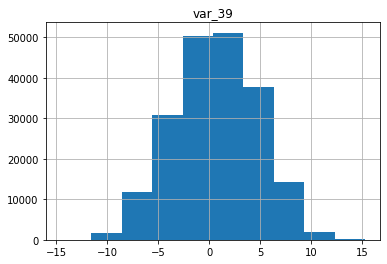


 var_40 



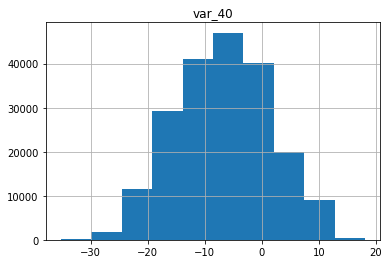


 var_41 



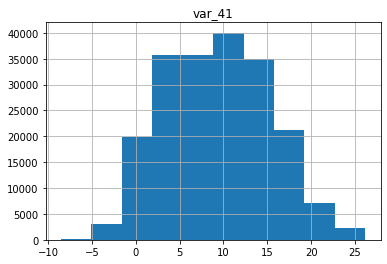


 var_42 



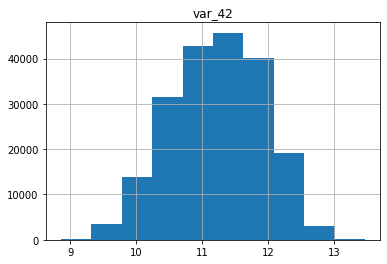


 var_43 



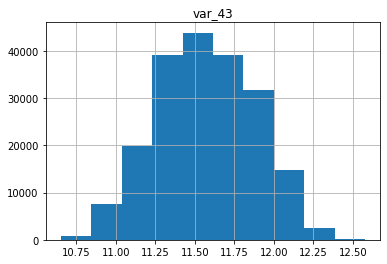


 var_44 



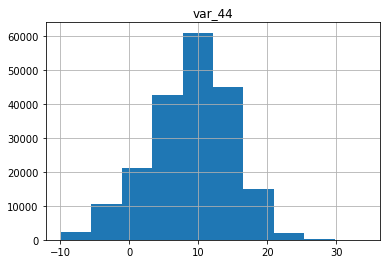


 var_45 



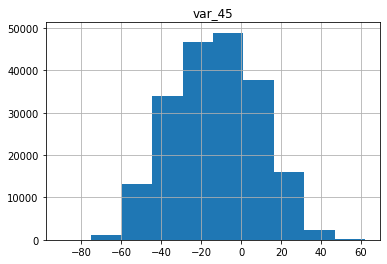


 var_46 



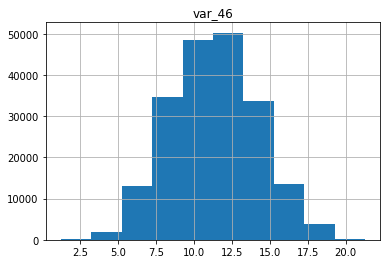


 var_47 



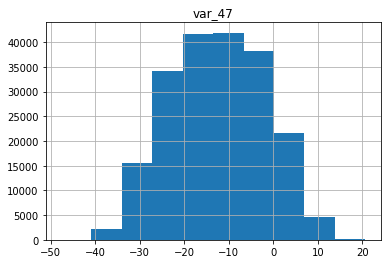


 var_48 



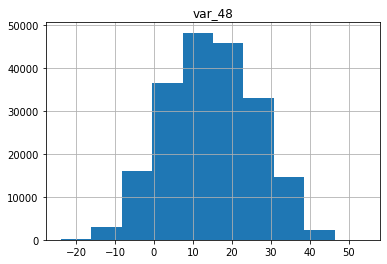


 var_49 



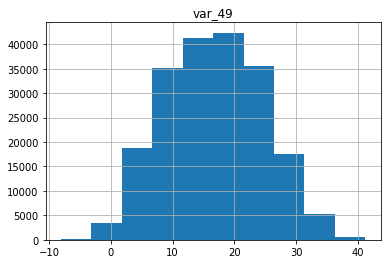


 var_50 



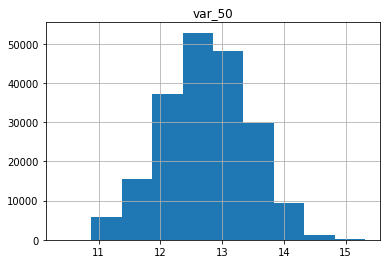


 var_51 



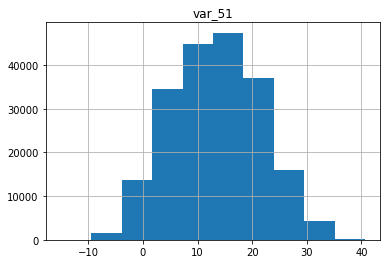


 var_52 



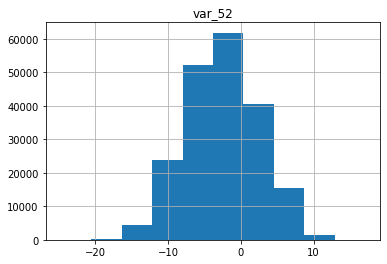


 var_53 



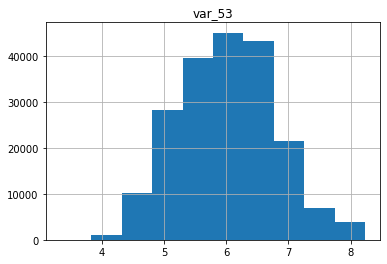


 var_54 



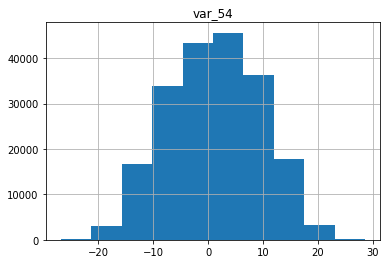


 var_55 



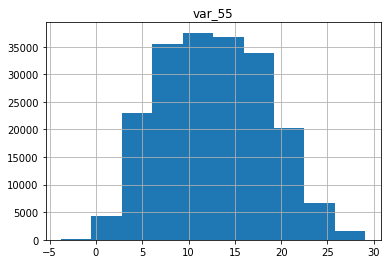


 var_56 



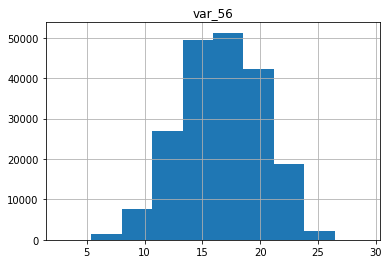


 var_57 



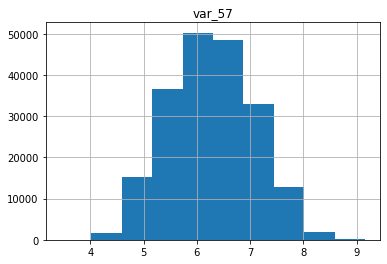


 var_58 



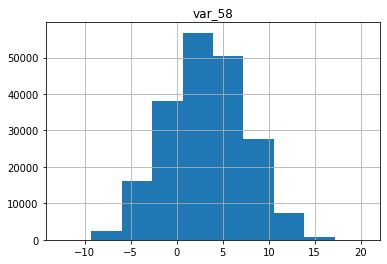


 var_59 



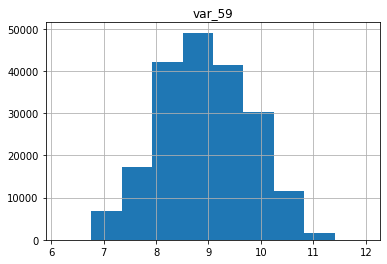


 var_60 



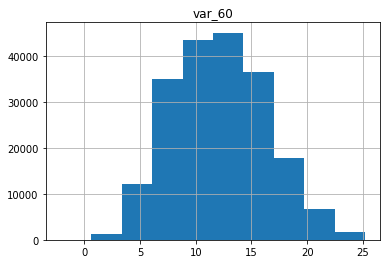


 var_61 



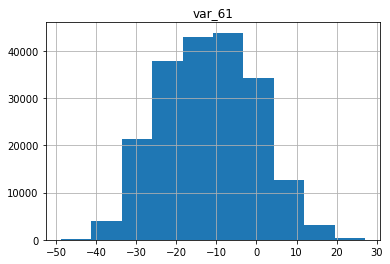


 var_62 



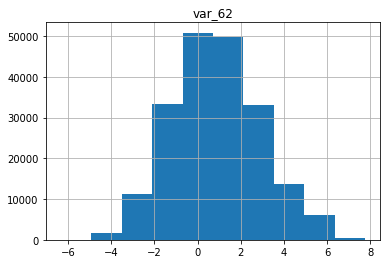


 var_63 



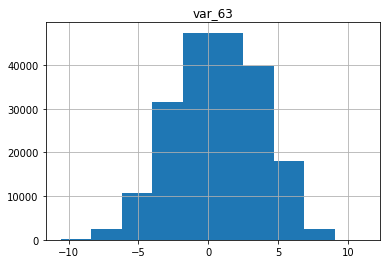


 var_64 



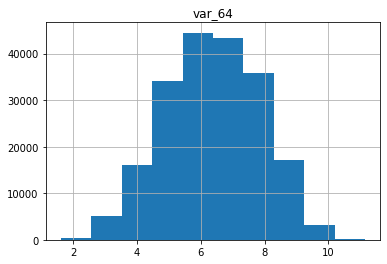


 var_65 



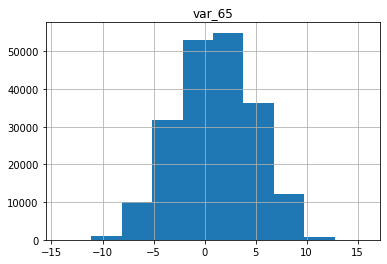


 var_66 



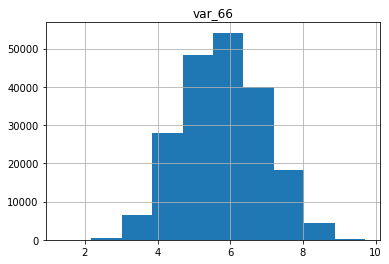


 var_67 



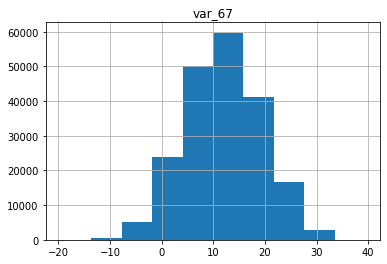


 var_68 



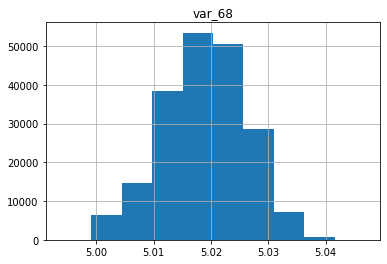


 var_69 



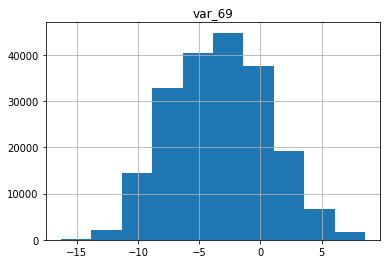


 var_70 



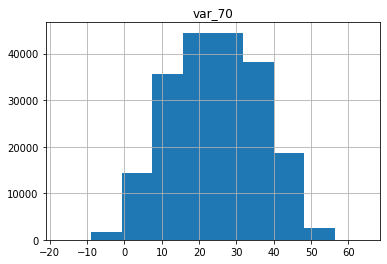


 var_71 



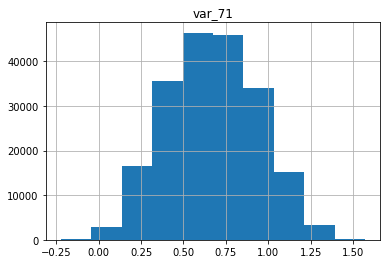


 var_72 



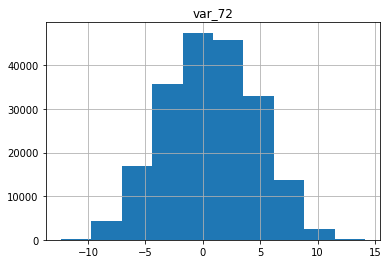


 var_73 



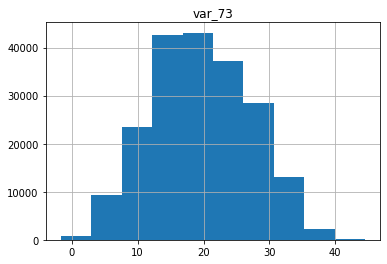


 var_74 



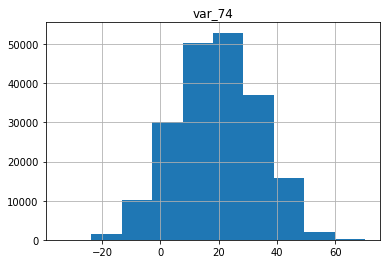


 var_75 



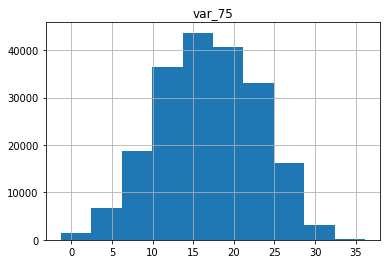


 var_76 



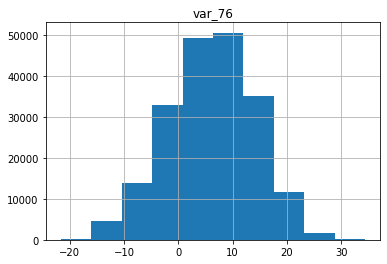


 var_77 



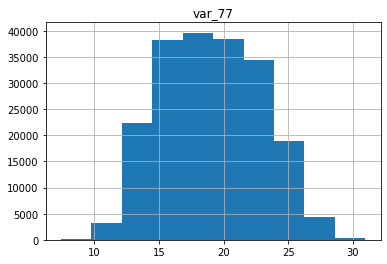


 var_78 



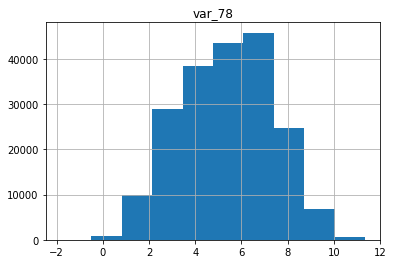


 var_79 



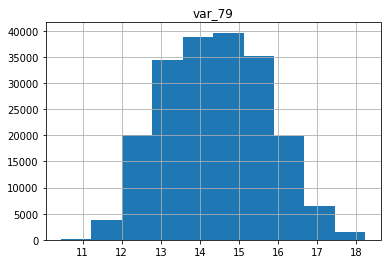


 var_80 



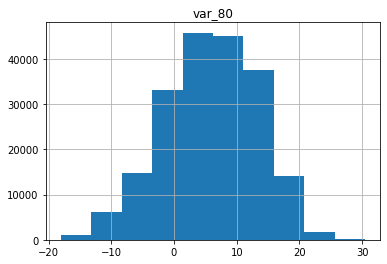


 var_81 



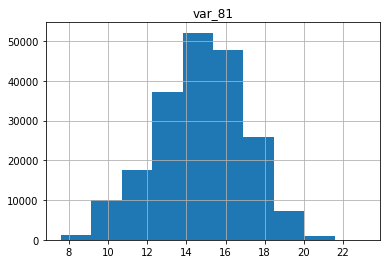


 var_82 



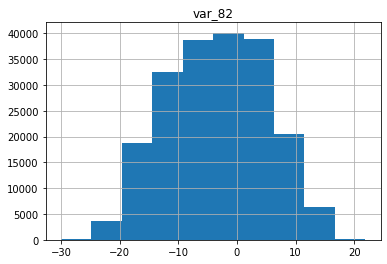


 var_83 



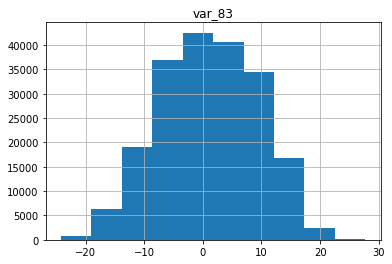


 var_84 



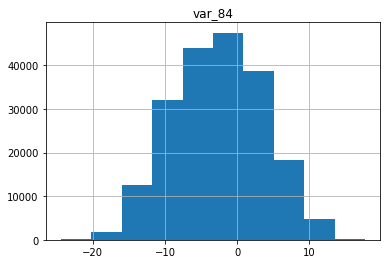


 var_85 



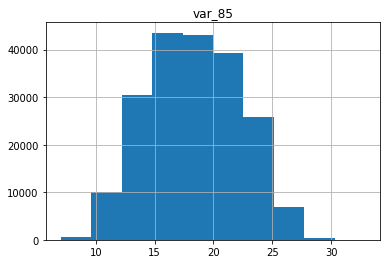


 var_86 



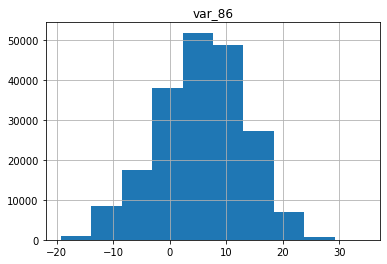


 var_87 



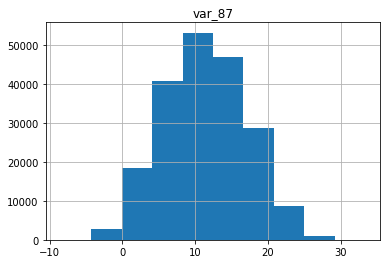


 var_88 



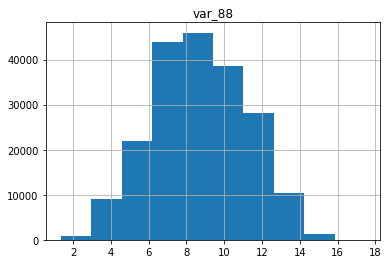


 var_89 



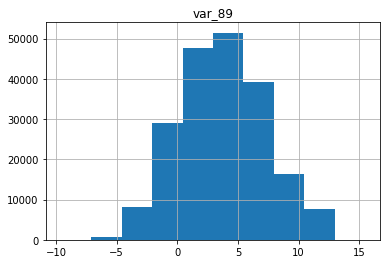


 var_90 



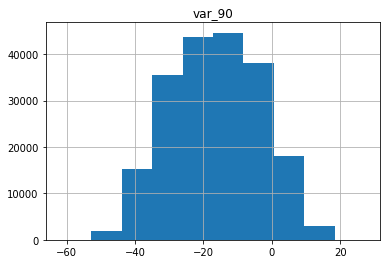


 var_91 



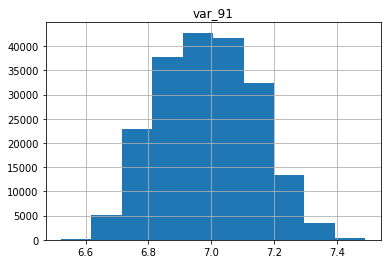


 var_92 



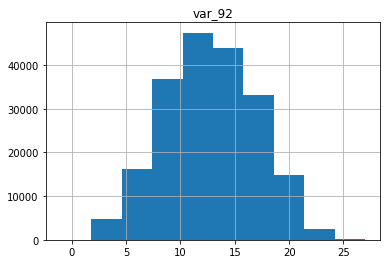


 var_93 



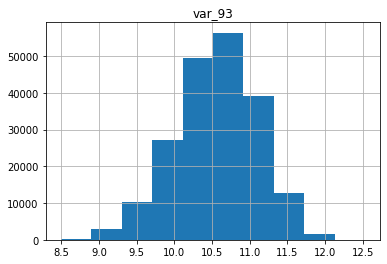


 var_94 



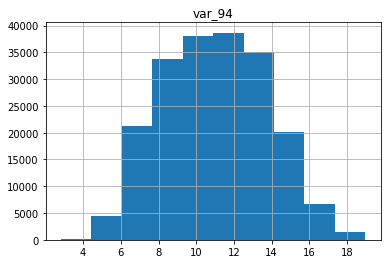


 var_95 



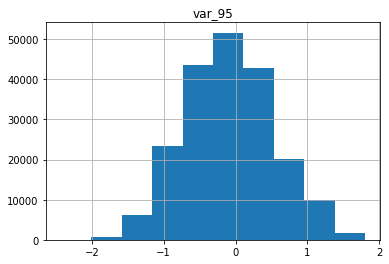


 var_96 



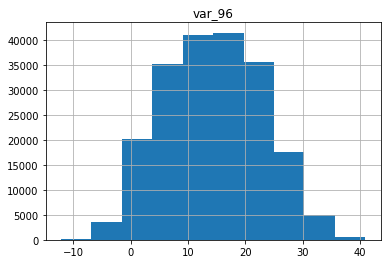


 var_97 



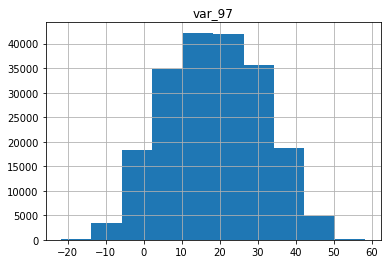


 var_98 



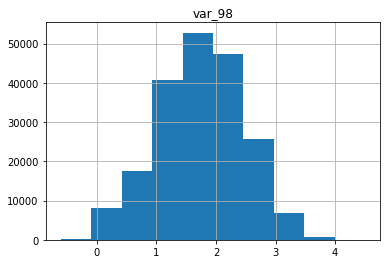


 var_99 



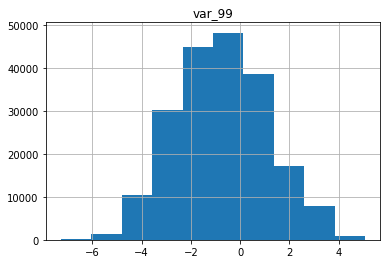


 var_100 



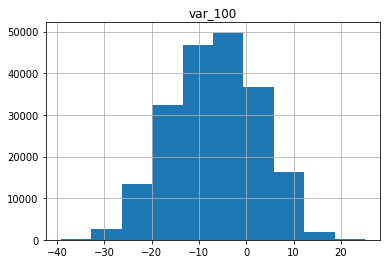


 var_101 



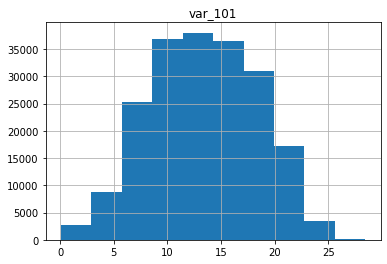


 var_102 



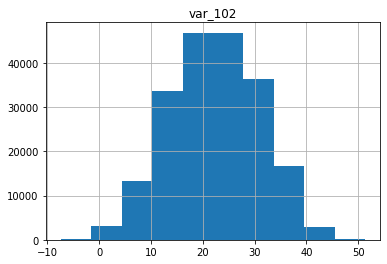


 var_103 



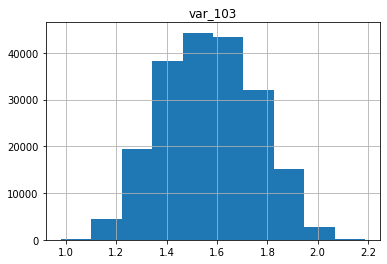


 var_104 



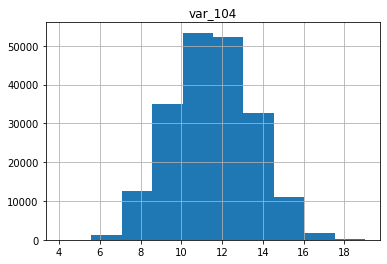


 var_105 



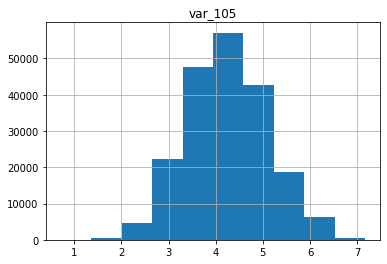


 var_106 



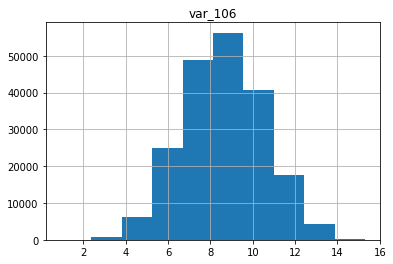


 var_107 



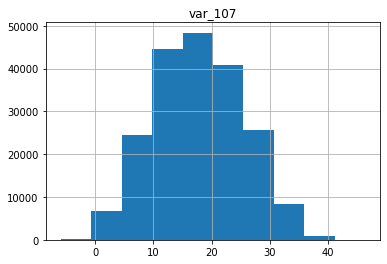


 var_108 



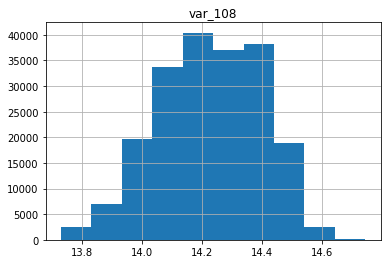


 var_109 



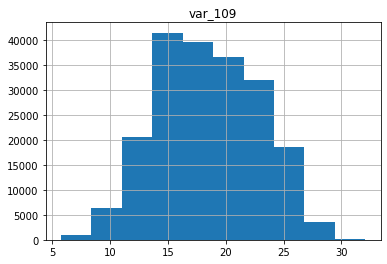


 var_110 



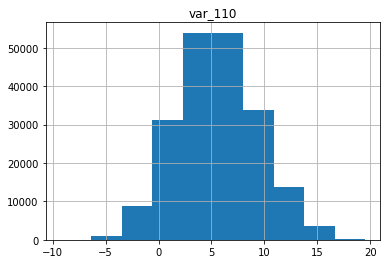


 var_111 



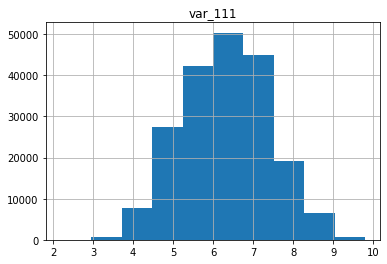


 var_112 



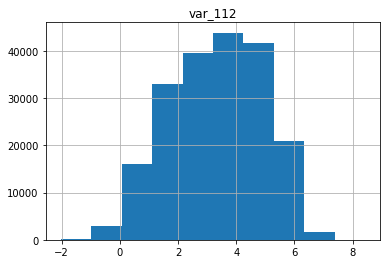


 var_113 



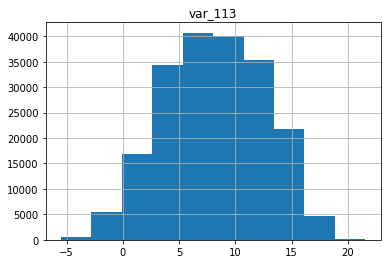


 var_114 



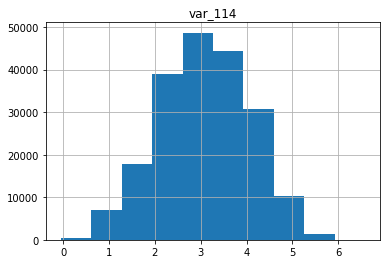


 var_115 



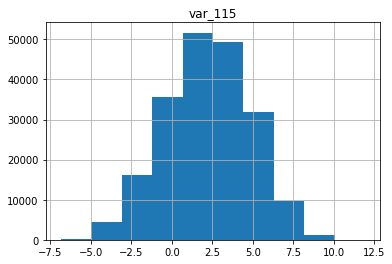


 var_116 



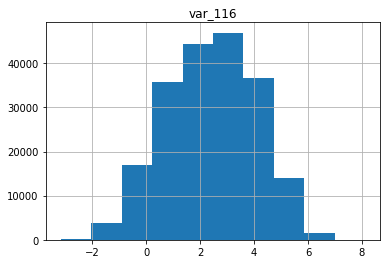


 var_117 



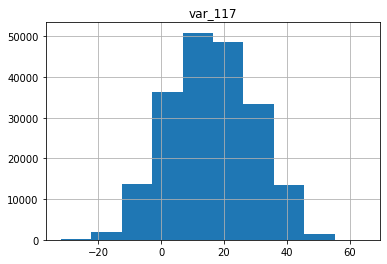


 var_118 



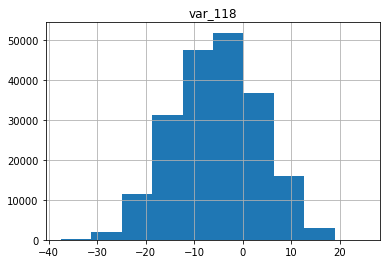


 var_119 



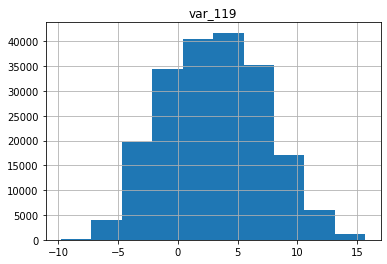


 var_120 



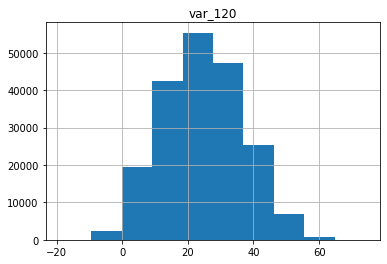


 var_121 



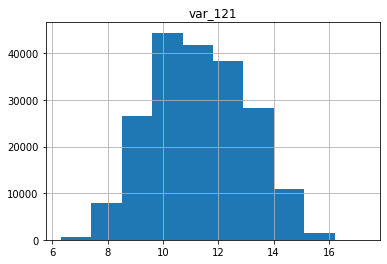


 var_122 



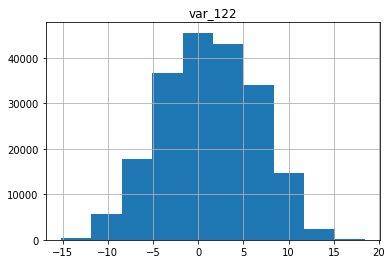


 var_123 



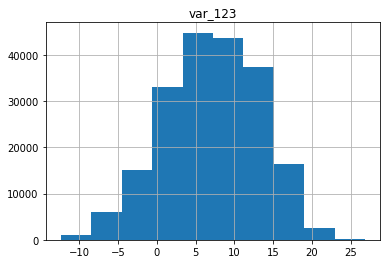


 var_124 



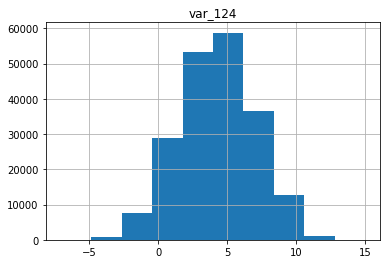


 var_125 



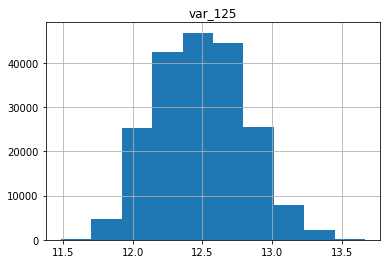


 var_126 



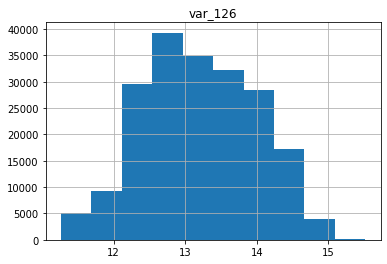


 var_127 



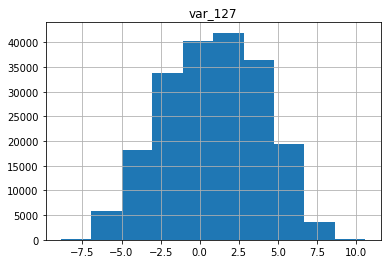


 var_128 



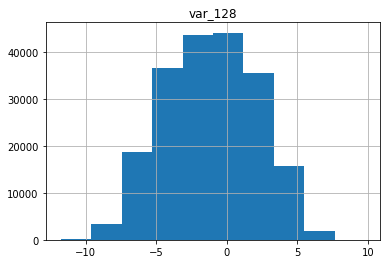


 var_129 



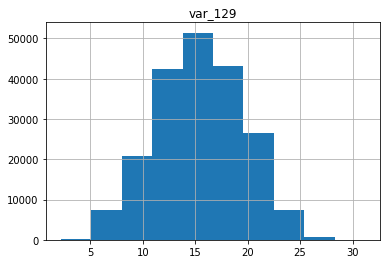


 var_130 



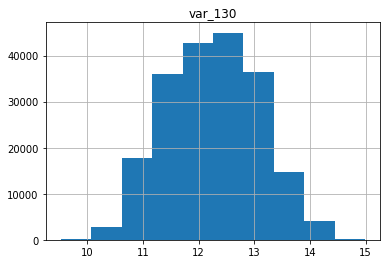


 var_131 



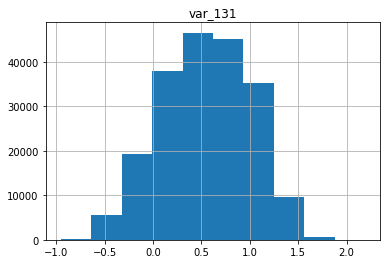


 var_132 



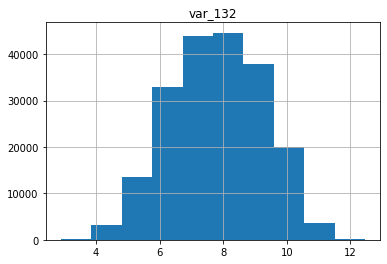


 var_133 



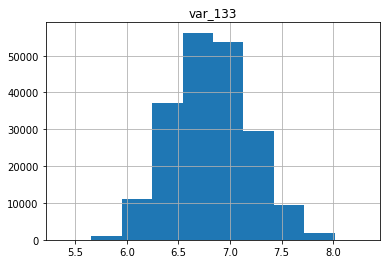


 var_134 



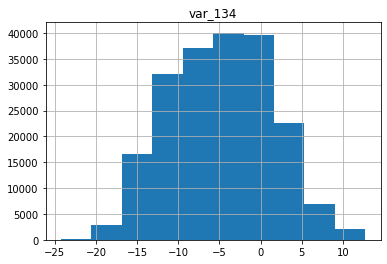


 var_135 



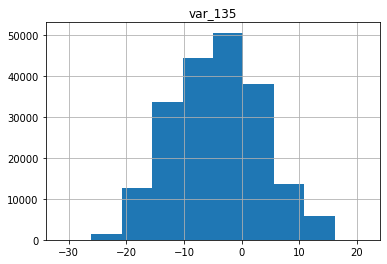


 var_136 



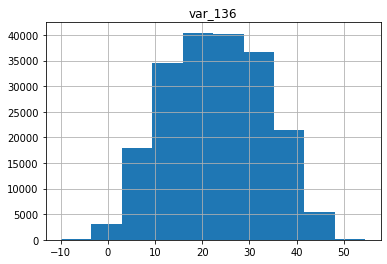


 var_137 



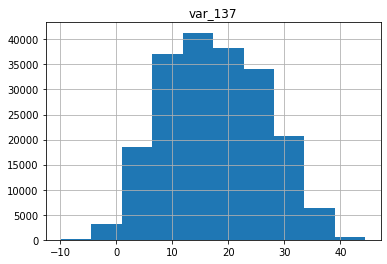


 var_138 



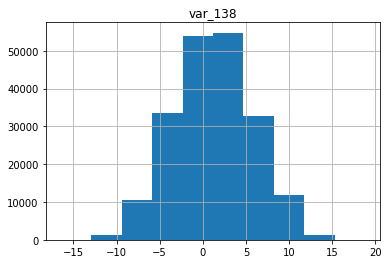


 var_139 



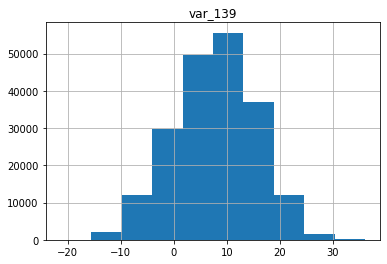


 var_140 



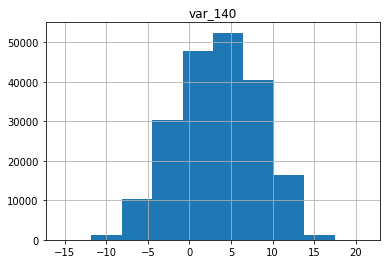


 var_141 



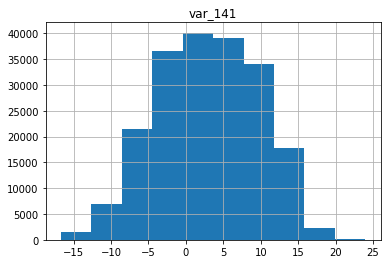


 var_142 



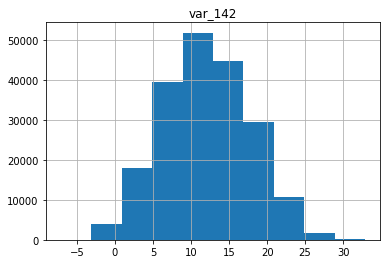


 var_143 



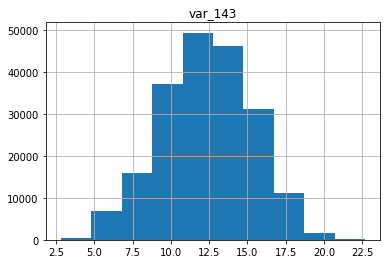


 var_144 



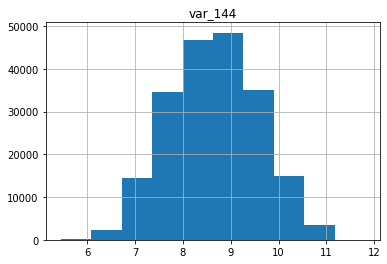


 var_145 



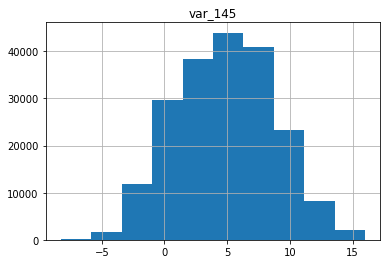


 var_146 



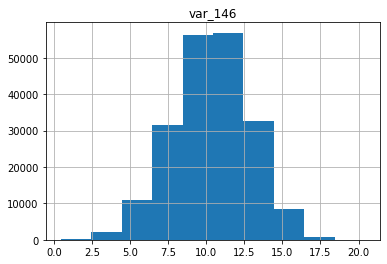


 var_147 



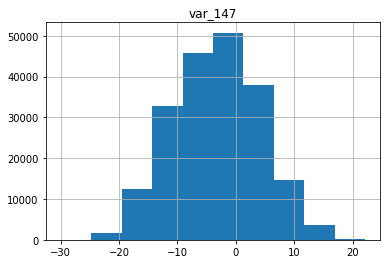


 var_148 



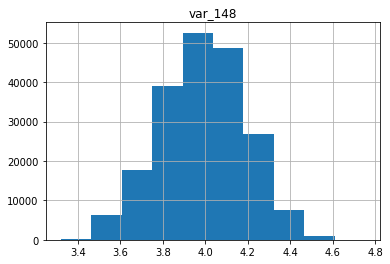


 var_149 



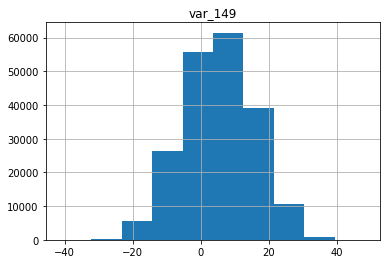


 var_150 



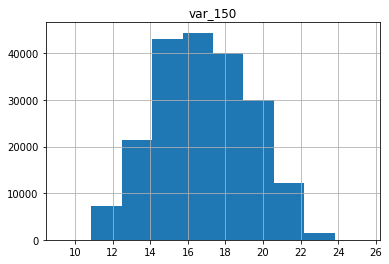


 var_151 



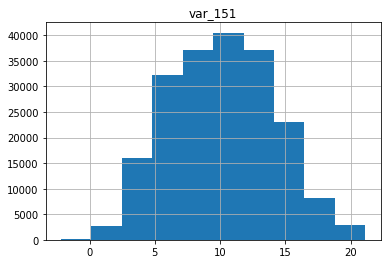


 var_152 



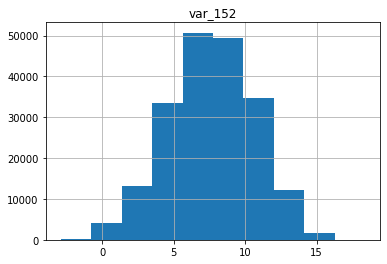


 var_153 



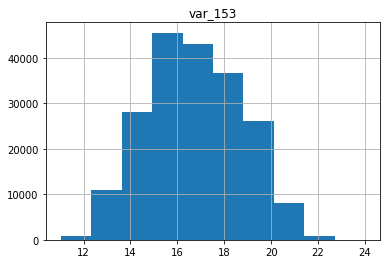


 var_154 



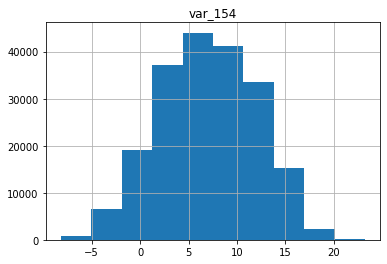


 var_155 



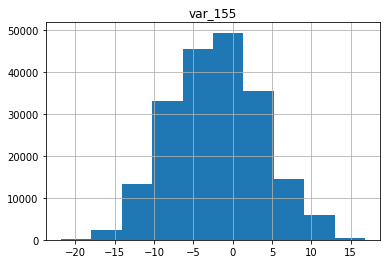


 var_156 



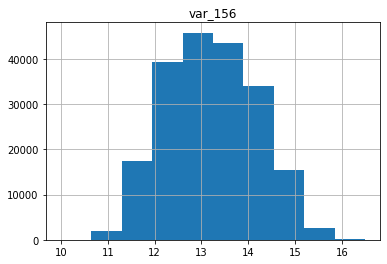


 var_157 



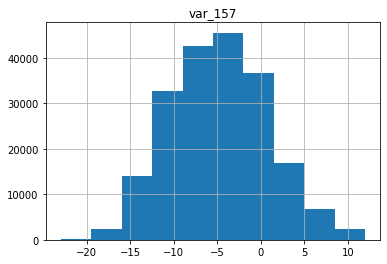


 var_158 



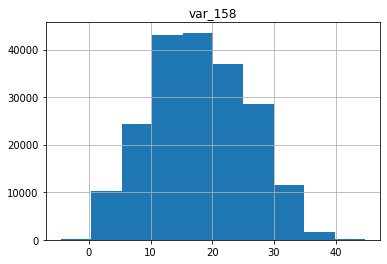


 var_159 



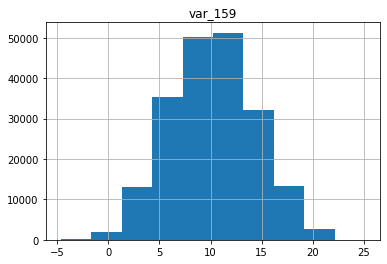


 var_160 



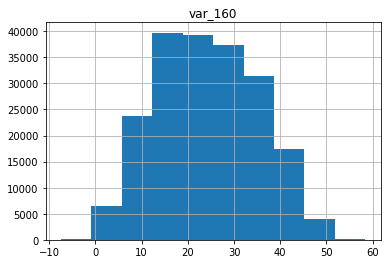


 var_161 



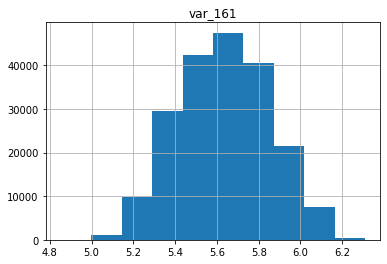


 var_162 



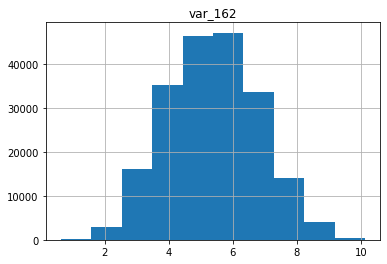


 var_163 



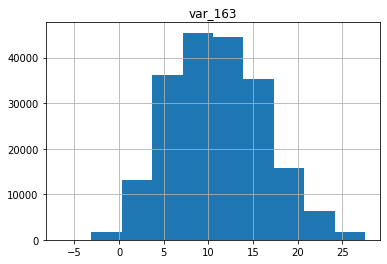


 var_164 



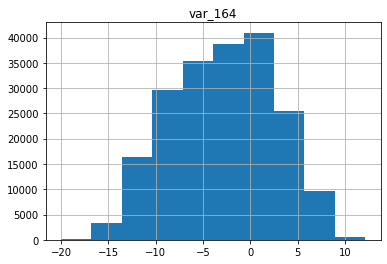


 var_165 



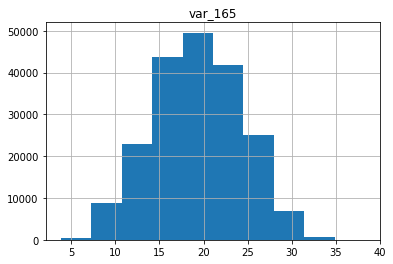


 var_166 



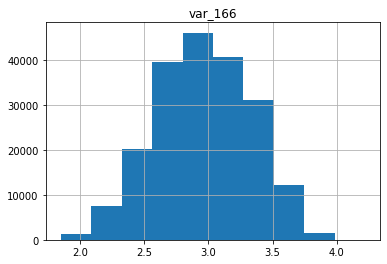


 var_167 



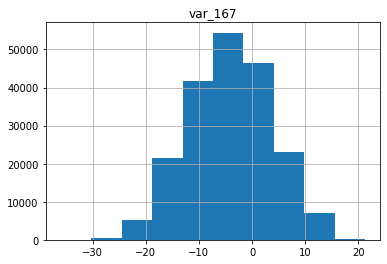


 var_168 



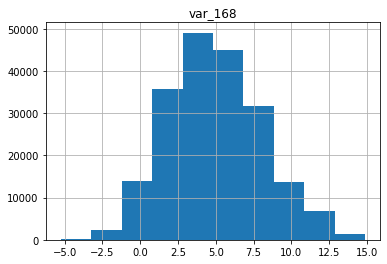


 var_169 



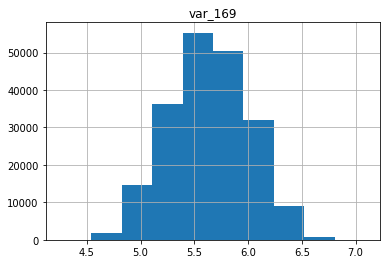


 var_170 



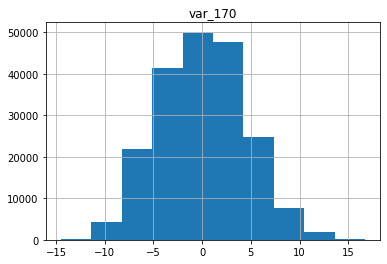


 var_171 



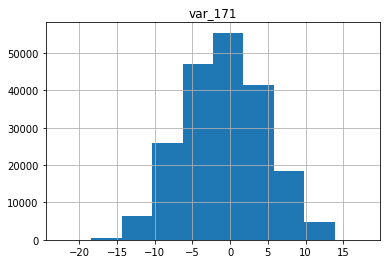


 var_172 



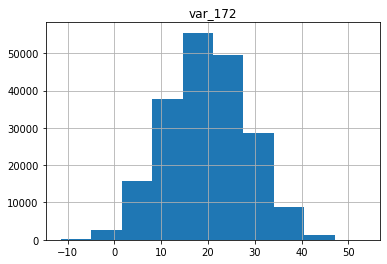


 var_173 



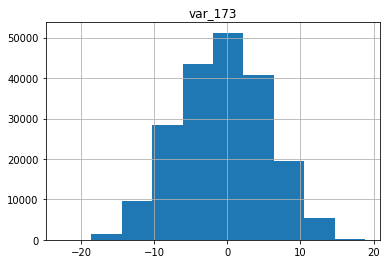


 var_174 



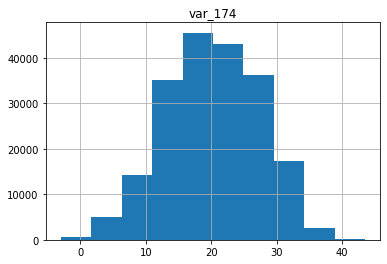


 var_175 



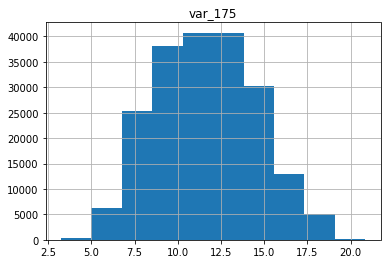


 var_176 



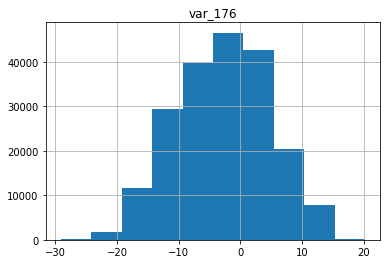


 var_177 



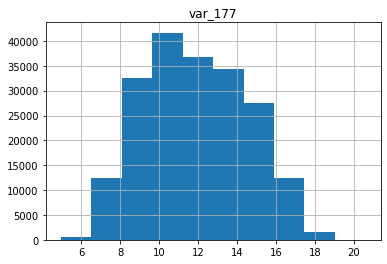


 var_178 



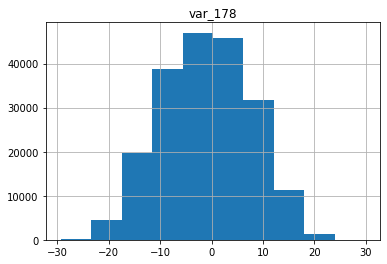


 var_179 



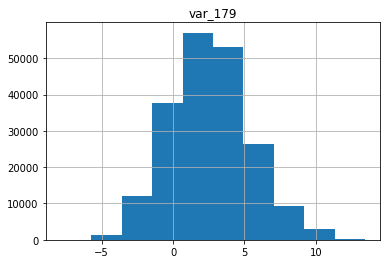


 var_180 



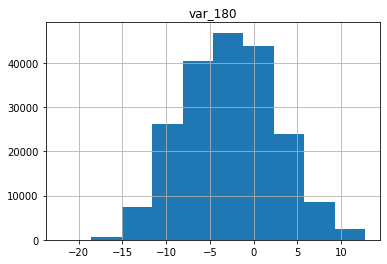


 var_181 



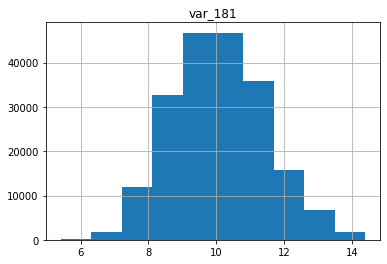


 var_182 



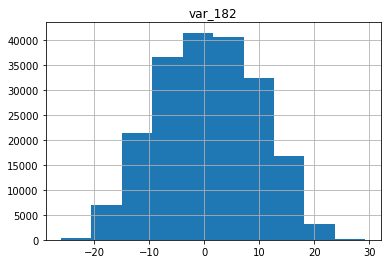


 var_183 



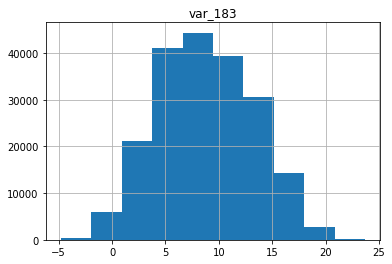


 var_184 



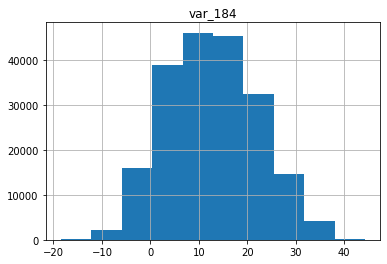


 var_185 



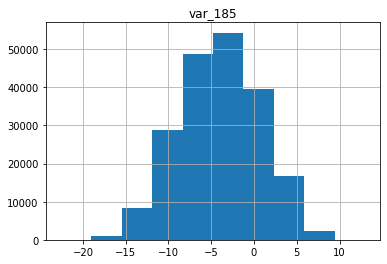


 var_186 



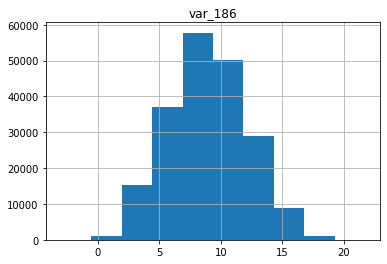


 var_187 



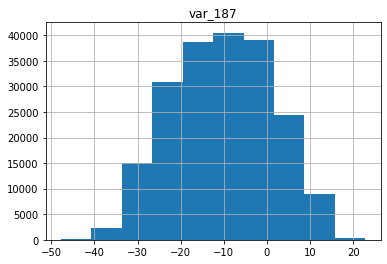


 var_188 



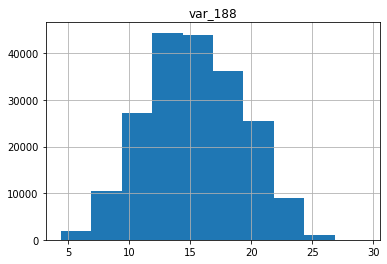


 var_189 



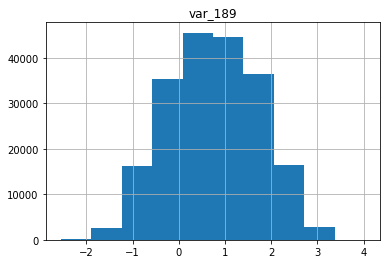


 var_190 



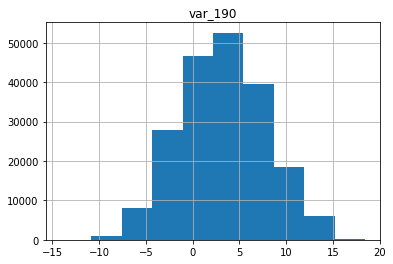


 var_191 



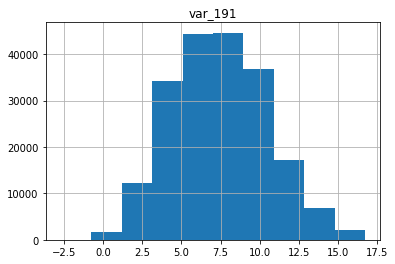


 var_192 



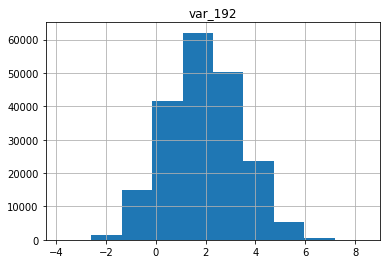


 var_193 



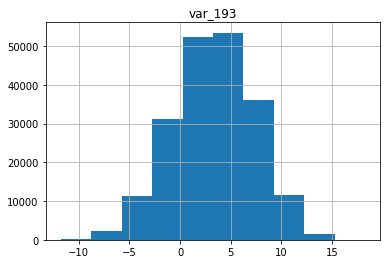


 var_194 



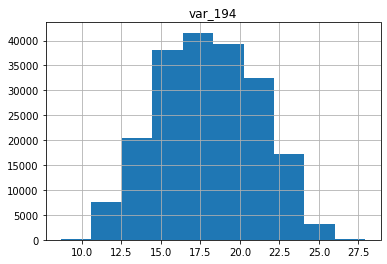


 var_195 



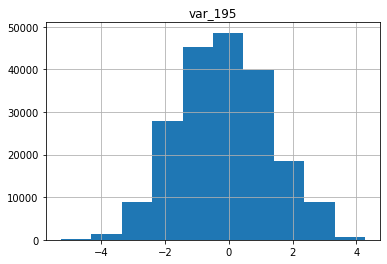


 var_196 



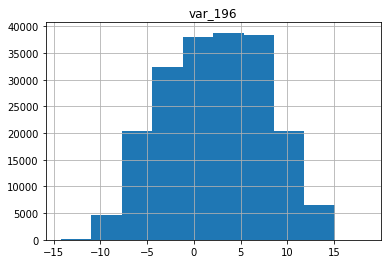


 var_197 



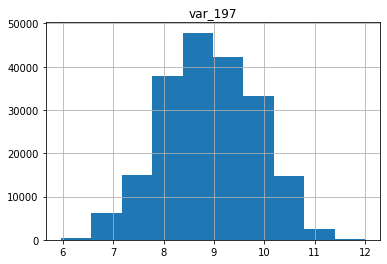


 var_198 



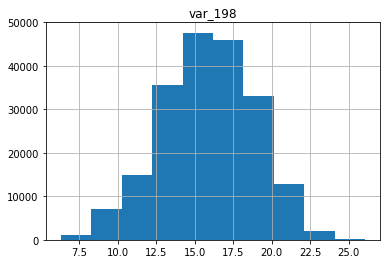


 var_199 



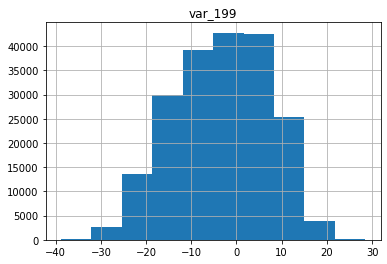

In [38]:
# show histograms of data columns
for col in num_columns:
  print("\n", col, "\n")
  ser = app_train[col]
  ser.describe()
  app_train.hist(col)
  plt.show();

all the cols seem to have a normal distribution, with no outliers - good!

In [15]:
# Load test data
# Training data
app_test = pd.read_csv('test.csv')
print('Test data shape: ', app_test.shape)
print('\n\nHead\n', app_test.head())
print('\n\ndtypes\n', app_test.dtypes)
print('\n\ndtype value counts\n', app_test.dtypes.value_counts())
print('\n\nDescribe\n')
app_test.describe()

# Number of each type of column
app_test.dtypes.value_counts()

# Missing values statistics
missing_values = missing_values_table(app_test)
missing_values.head(100)

Test data shape:  (200000, 201)


Head
   ID_code    var_0    var_1    var_2  ...  var_196  var_197  var_198  var_199
0  test_0  11.0656   7.7798  12.9536  ...   4.3654  10.7200  15.4722  -8.7197
1  test_1   8.5304   1.2543  11.3047  ...  -1.4852   9.8714  19.1293 -20.9760
2  test_2   5.4827 -10.3581  10.1407  ...  -7.1086   7.0618  19.8956 -23.1794
3  test_3   8.5374  -1.3222  12.0220  ...   3.9567   9.2295  13.0168  -4.2108
4  test_4  11.7058  -0.1327  14.1295  ...  -5.1612   7.2882  13.9260  -9.1846

[5 rows x 201 columns]


dtypes
 ID_code     object
var_0      float64
var_1      float64
var_2      float64
var_3      float64
            ...   
var_195    float64
var_196    float64
var_197    float64
var_198    float64
var_199    float64
Length: 201, dtype: object


dtype value counts
 float64    200
object       1
dtype: int64


Describe

Your selected dataframe has 201 columns.
There are 0 columns that have missing values.


Empty DataFrame
Columns: [Missing Values, % of Total Values]
Index: []

no misisng values - great!

num_columns = Index(['var_0', 'var_1', 'var_2', 'var_3', 'var_4', 'var_5', 'var_6', 'var_7',
       'var_8', 'var_9',
       ...
       'var_190', 'var_191', 'var_192', 'var_193', 'var_194', 'var_195',
       'var_196', 'var_197', 'var_198', 'var_199'],
      dtype='object', length=200) 



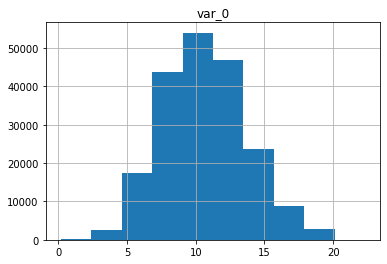

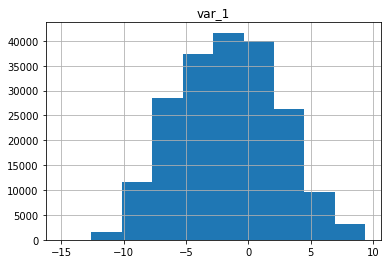

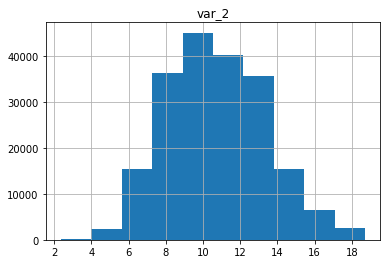

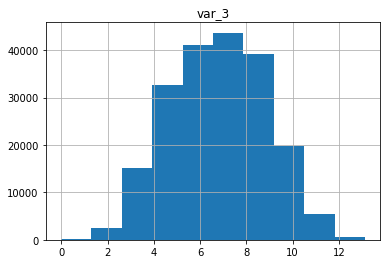

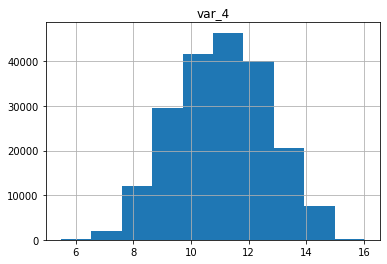

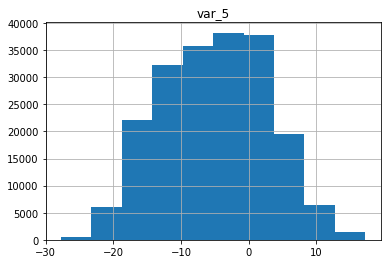

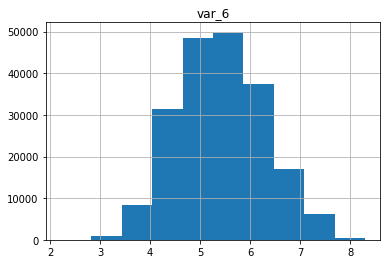

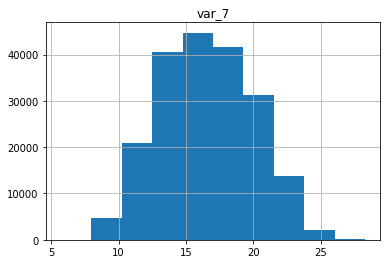

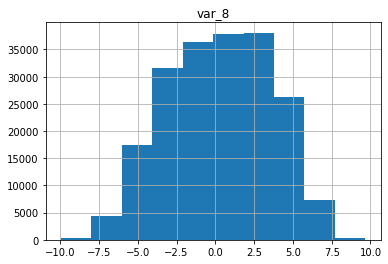

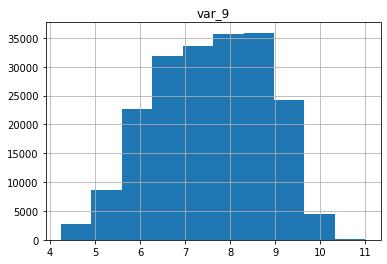

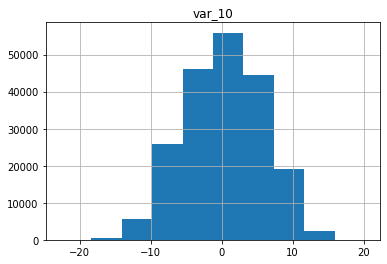

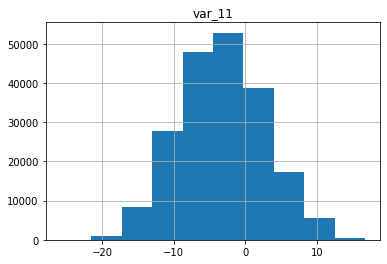

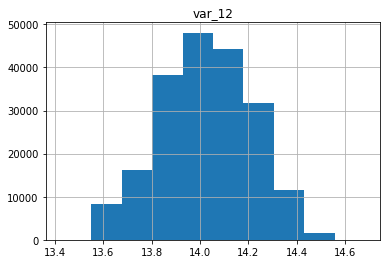

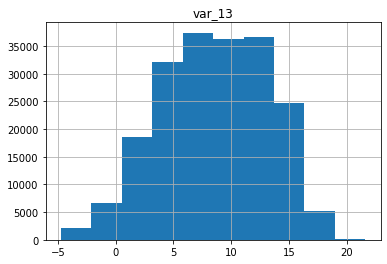

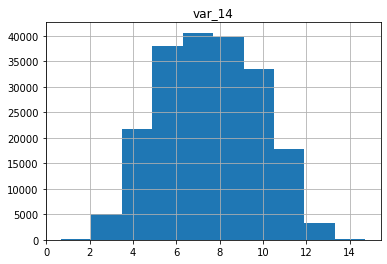

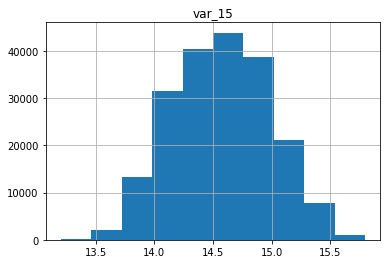

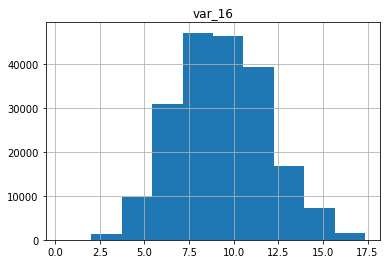

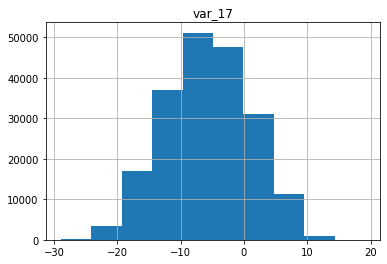

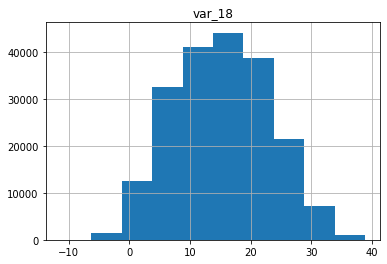

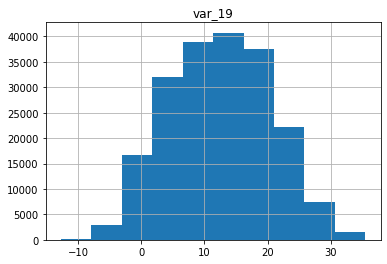

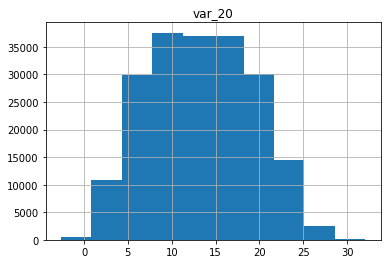

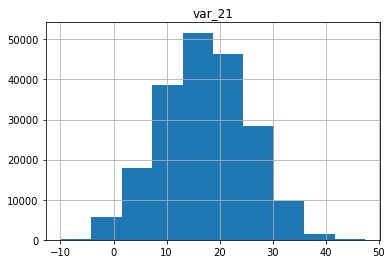

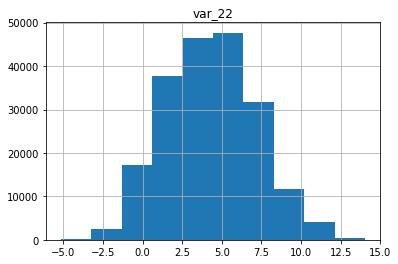

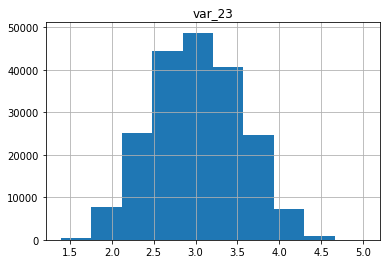

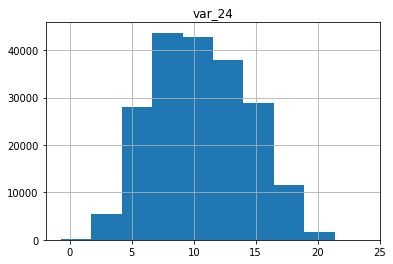

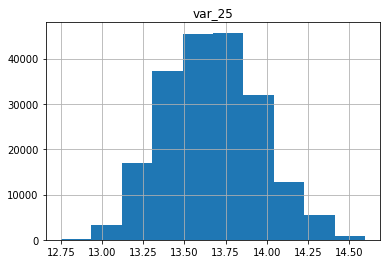

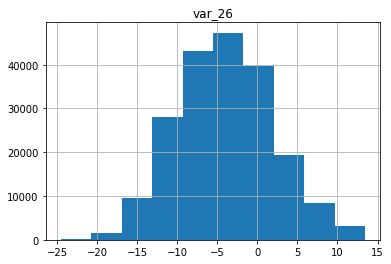

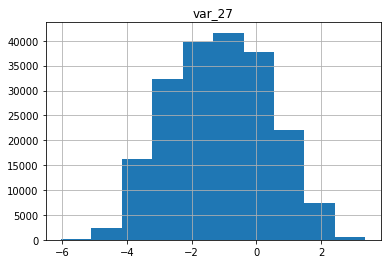

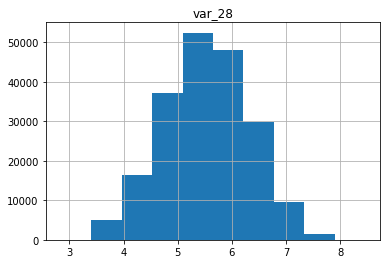

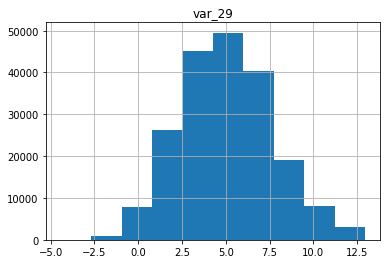

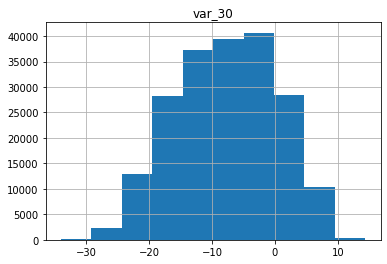

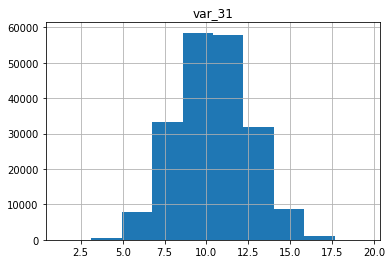

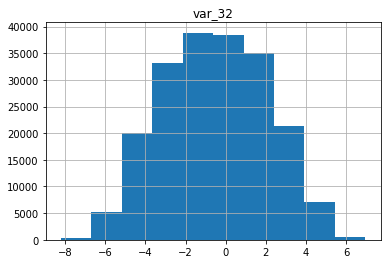

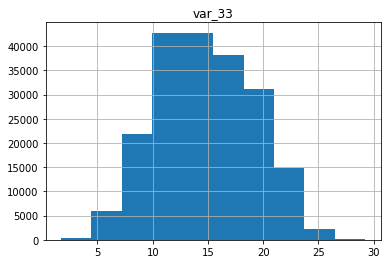

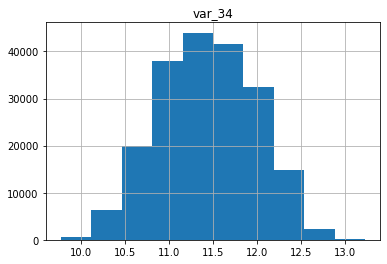

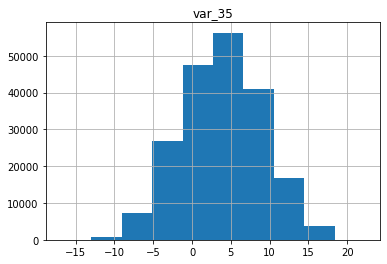

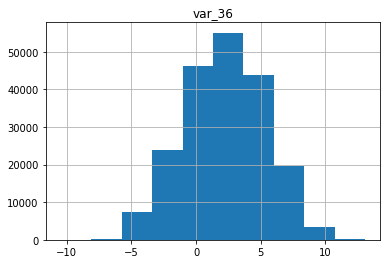

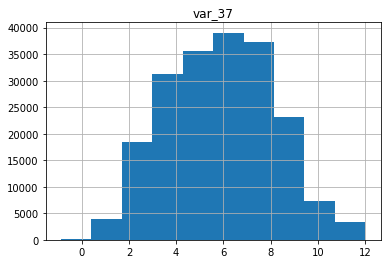

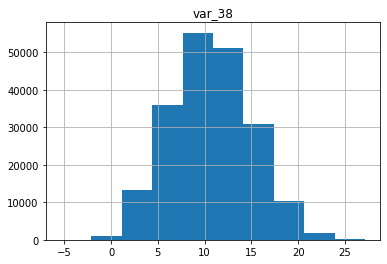

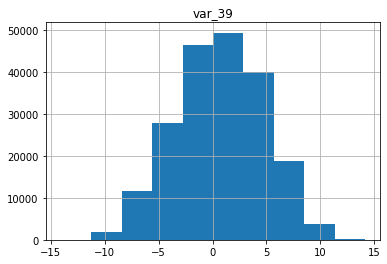

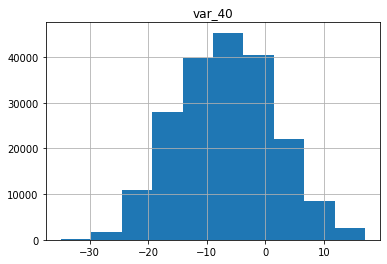

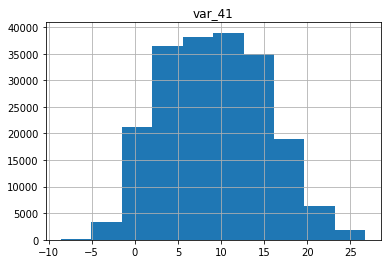

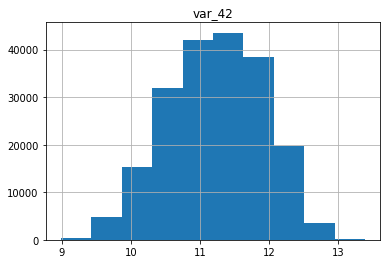

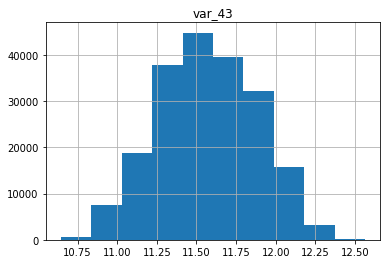

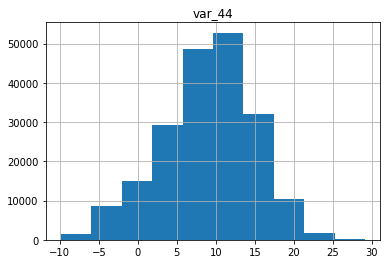

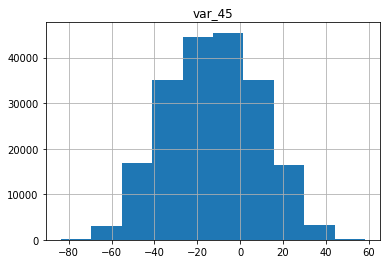

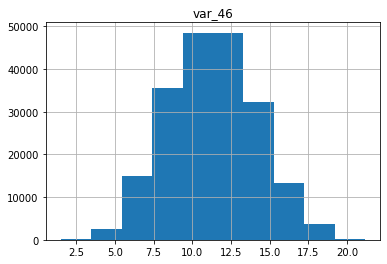

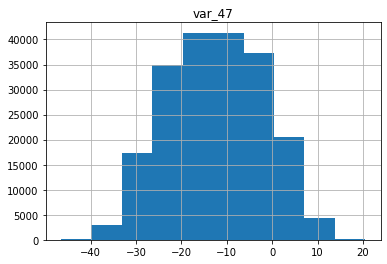

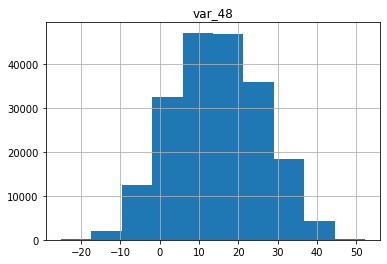

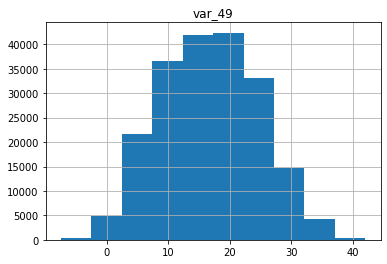

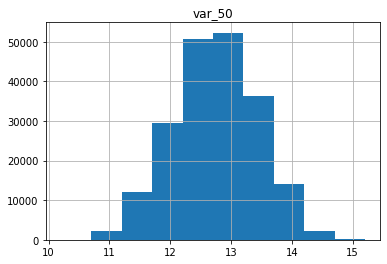

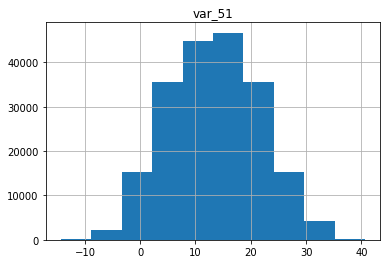

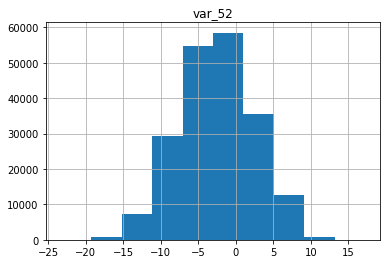

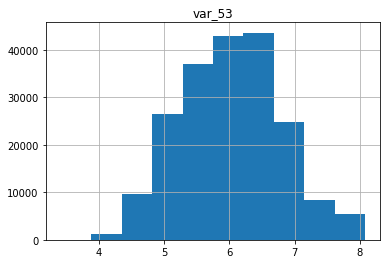

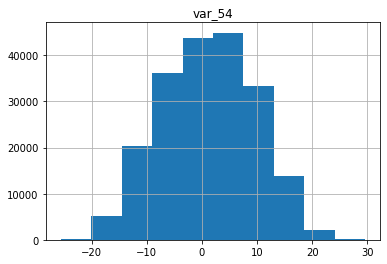

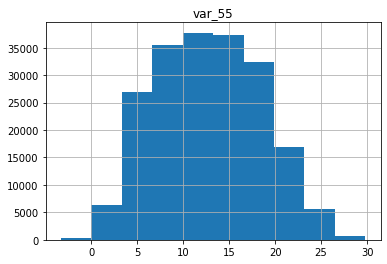

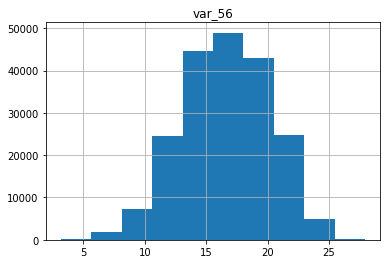

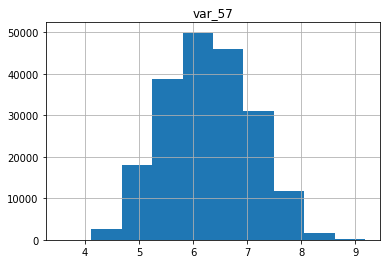

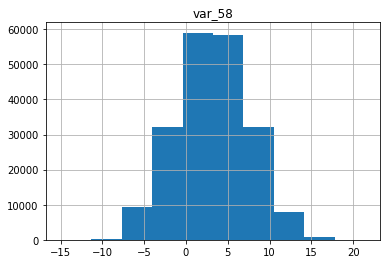

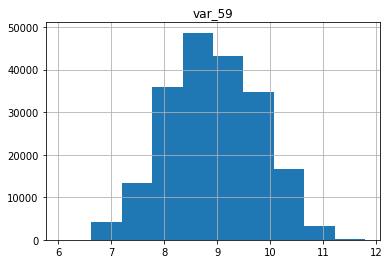

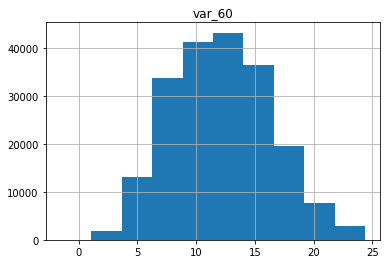

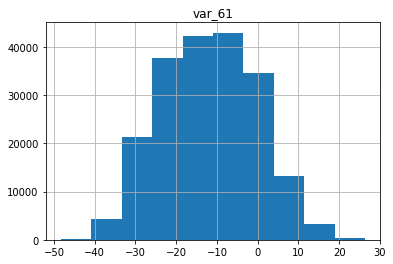

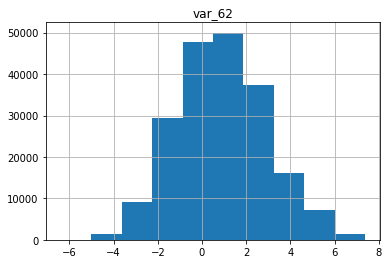

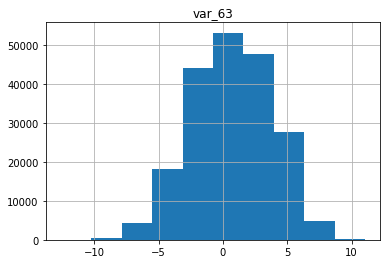

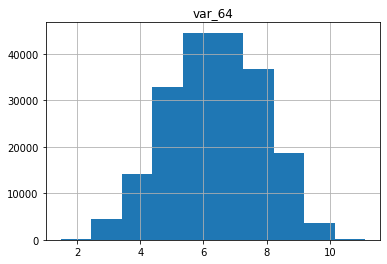

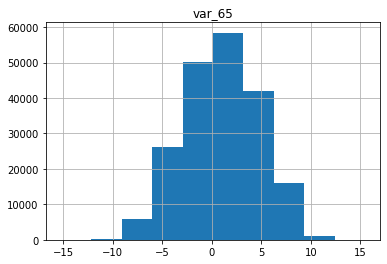

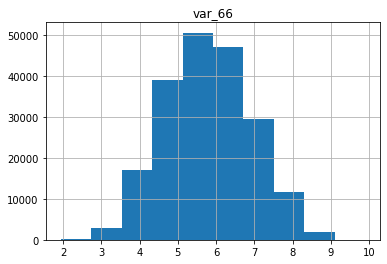

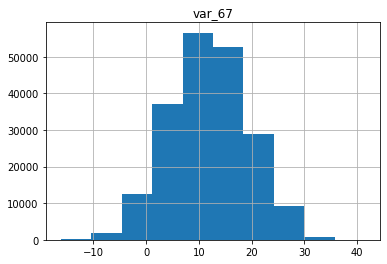

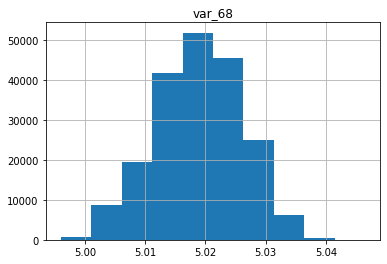

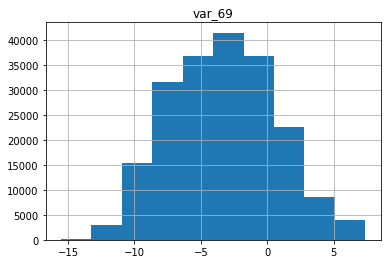

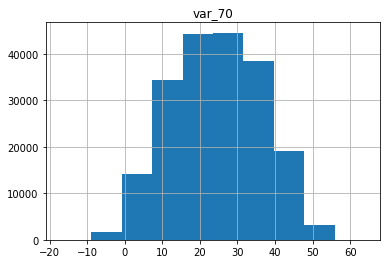

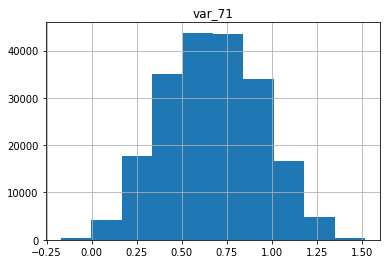

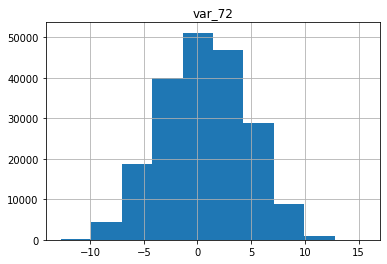

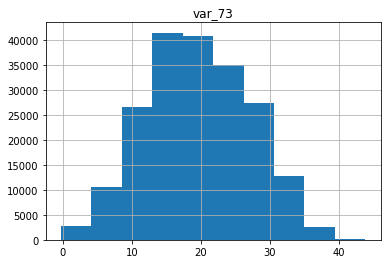

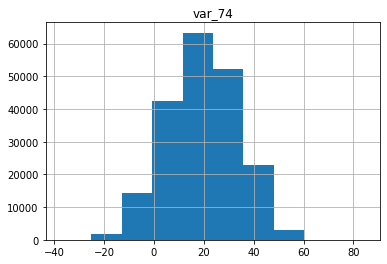

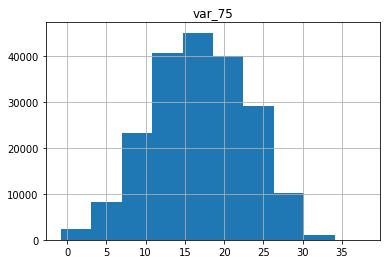

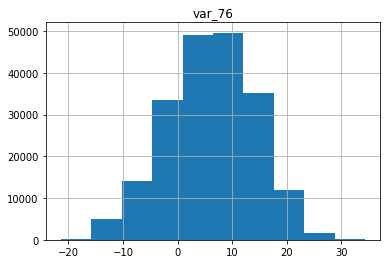

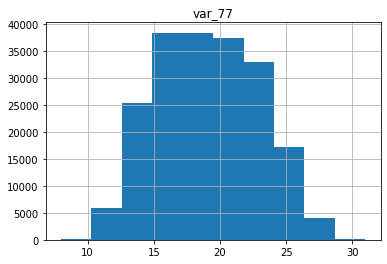

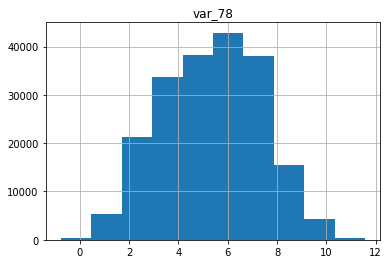

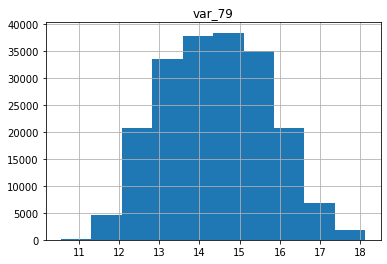

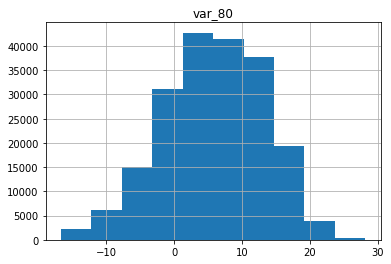

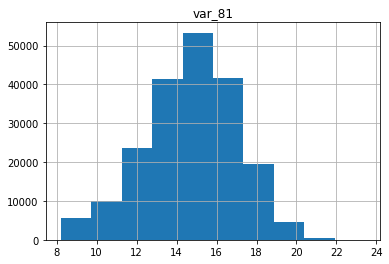

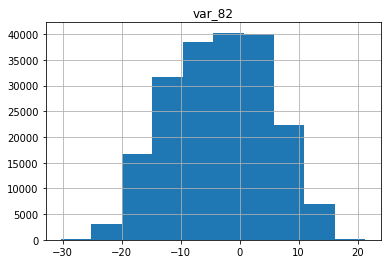

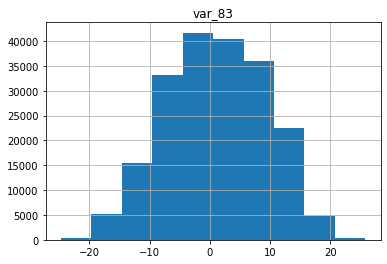

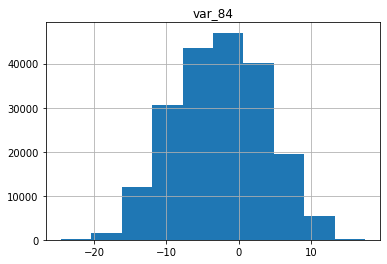

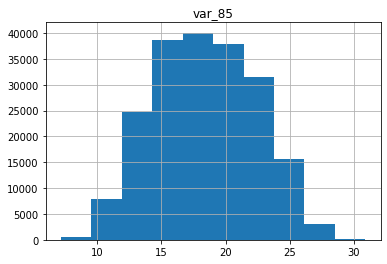

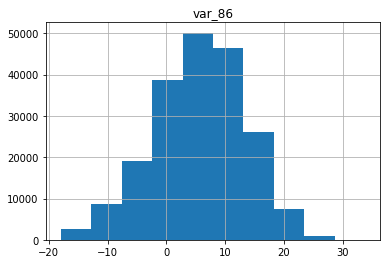

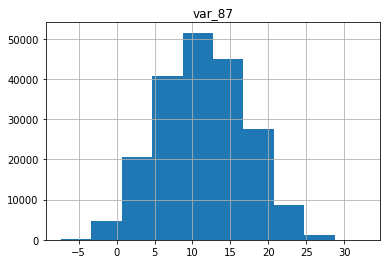

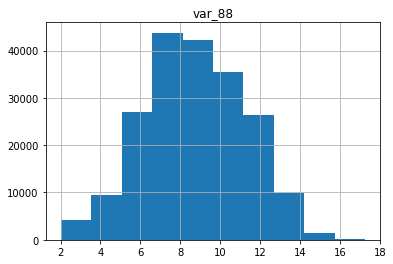

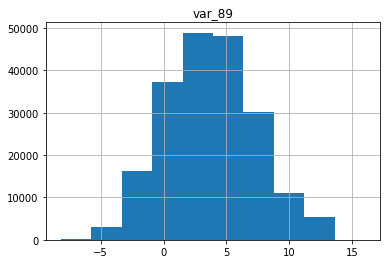

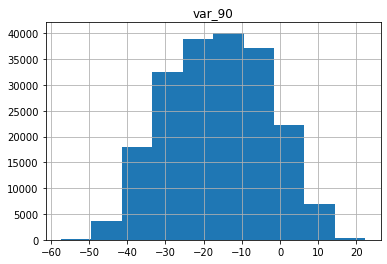

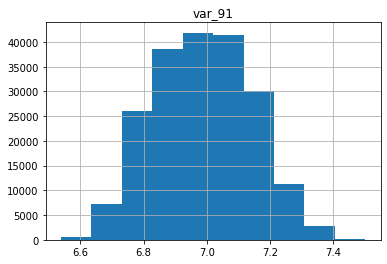

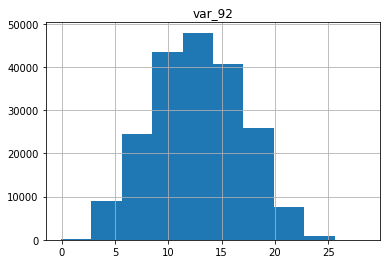

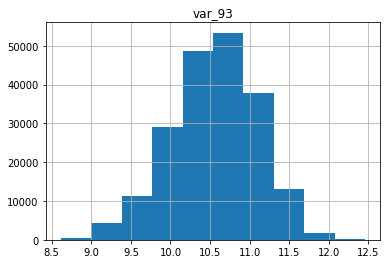

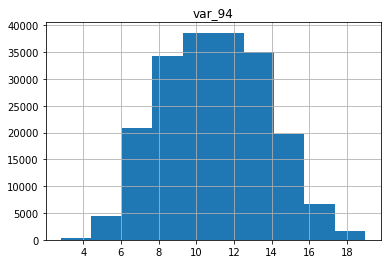

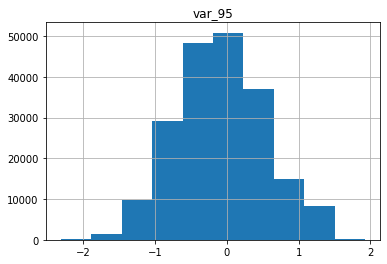

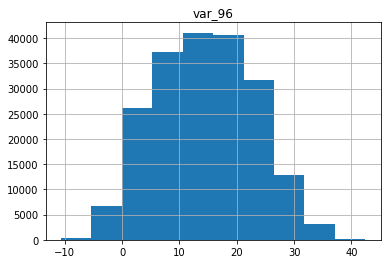

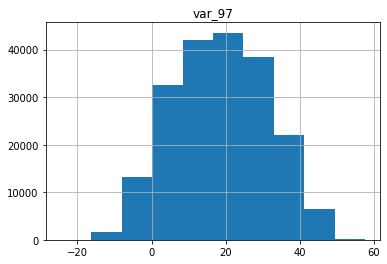

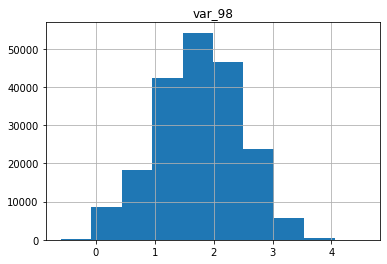

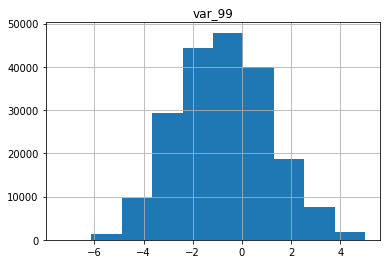

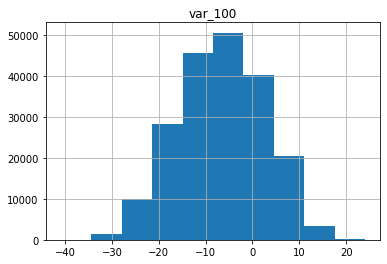

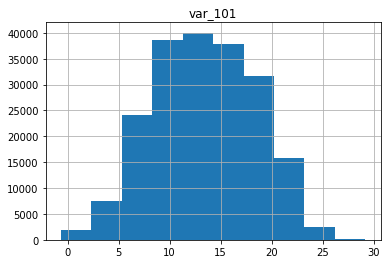

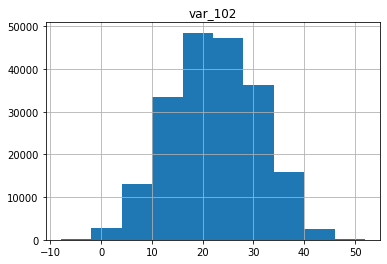

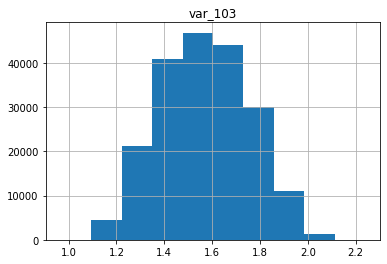

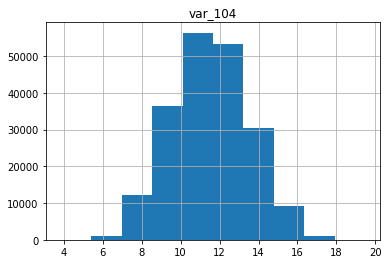

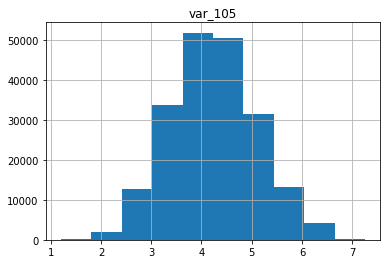

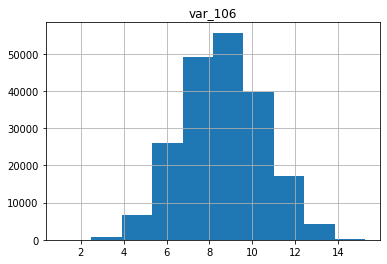

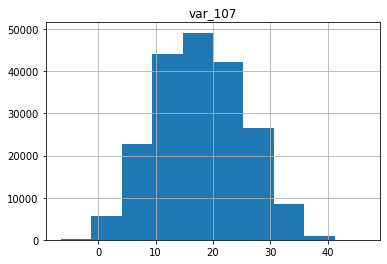

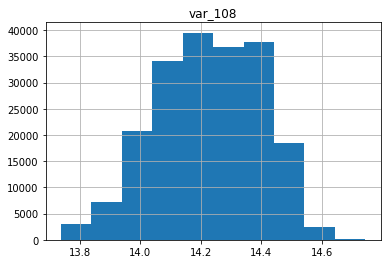

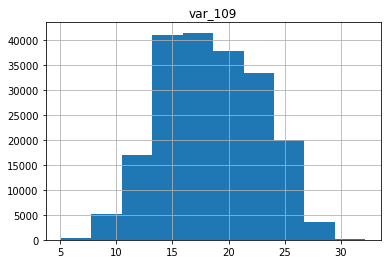

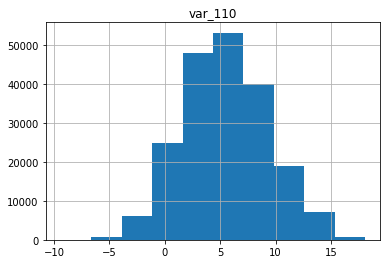

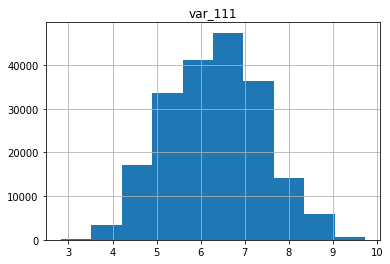

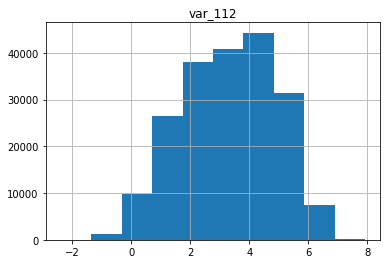

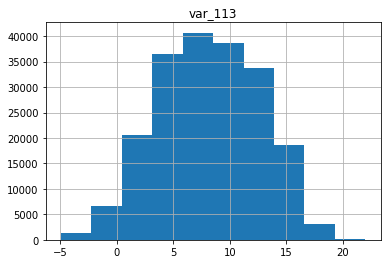

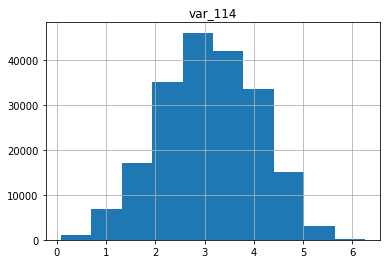

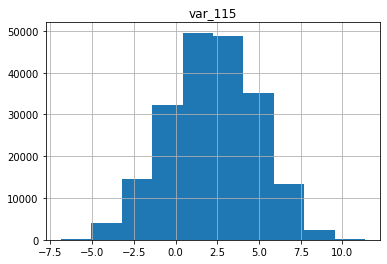

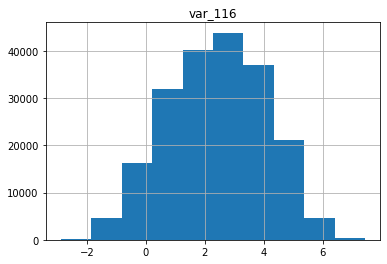

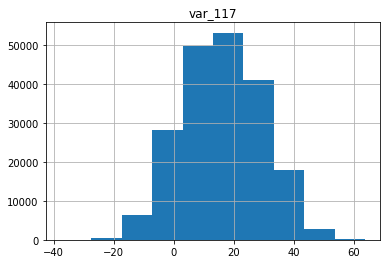

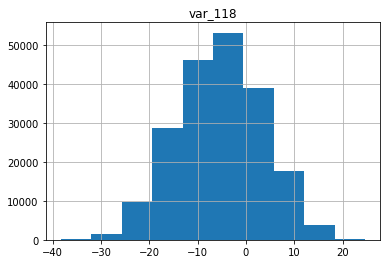

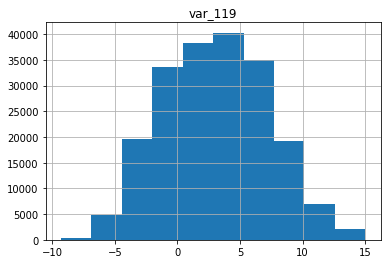

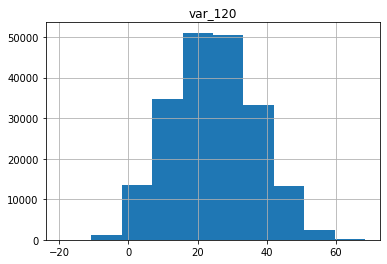

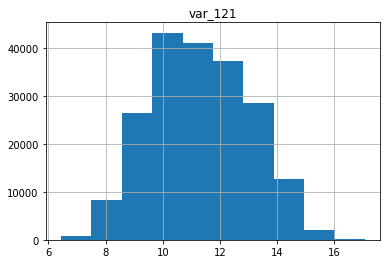

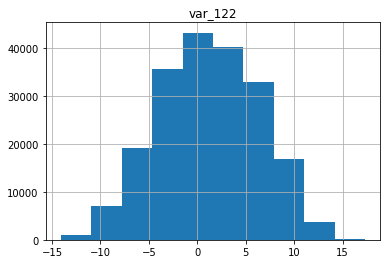

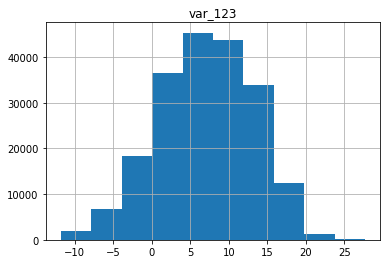

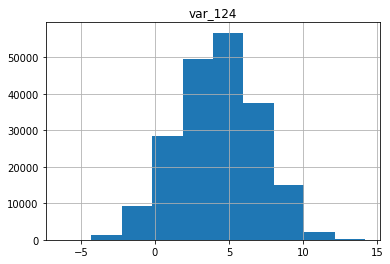

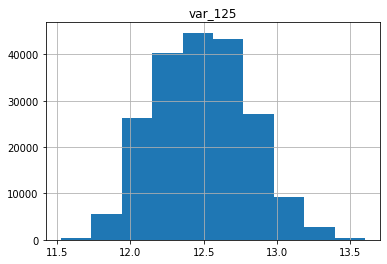

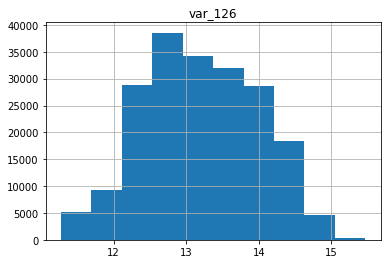

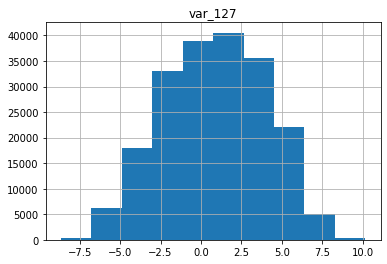

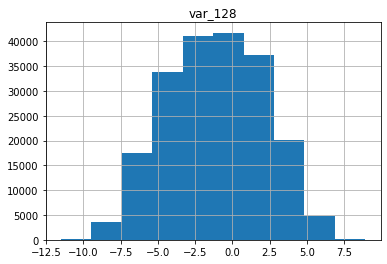

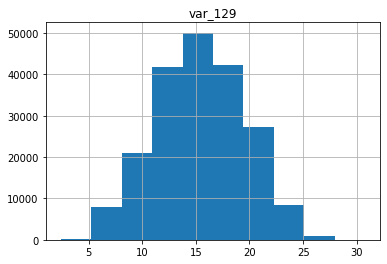

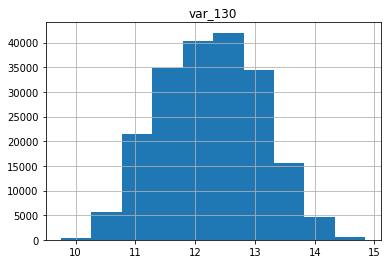

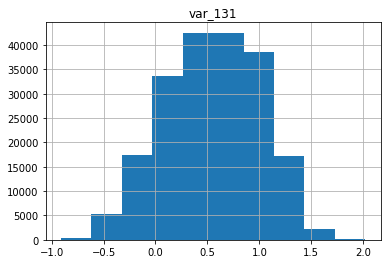

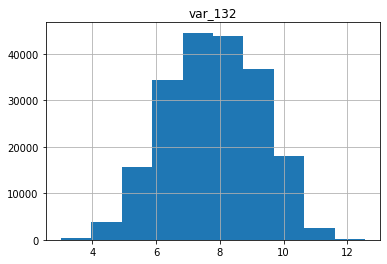

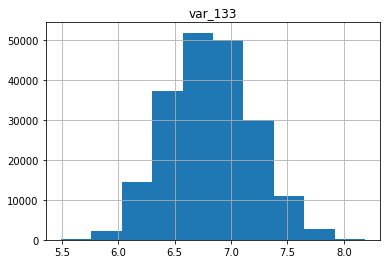

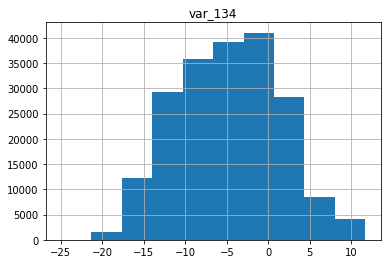

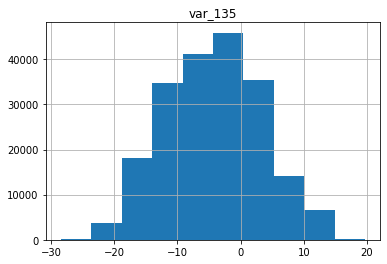

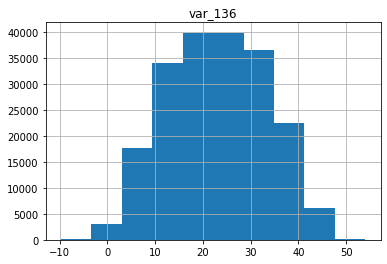

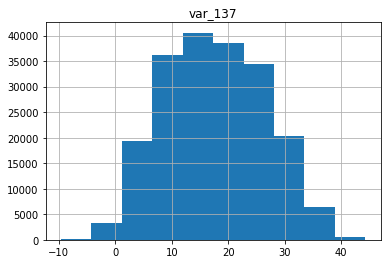

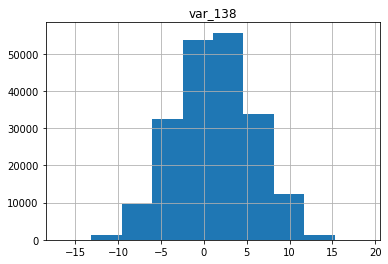

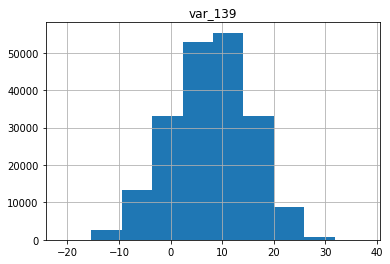

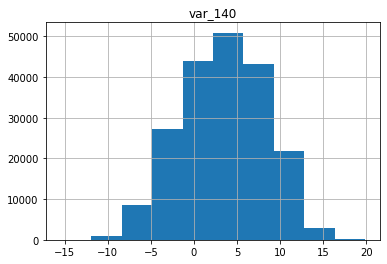

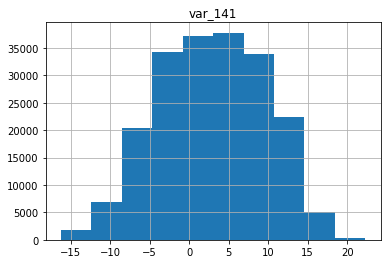

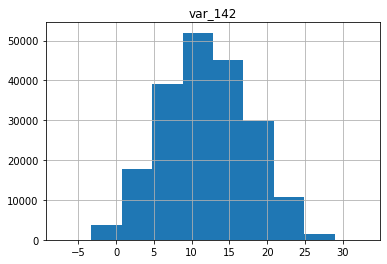

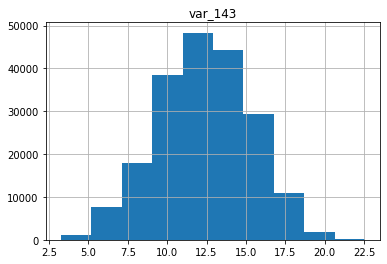

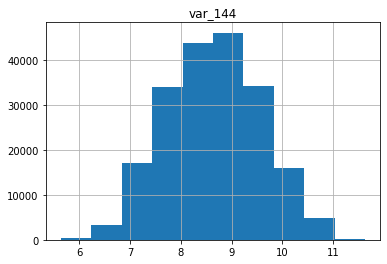

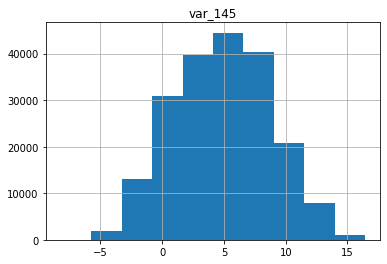

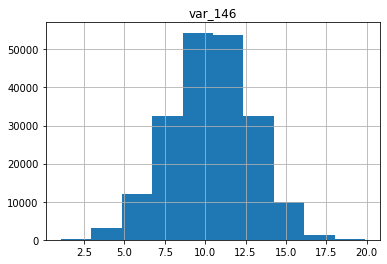

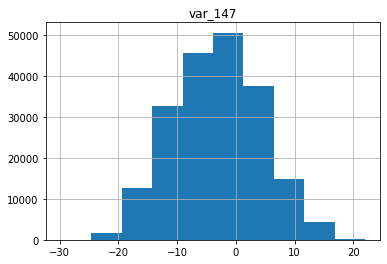

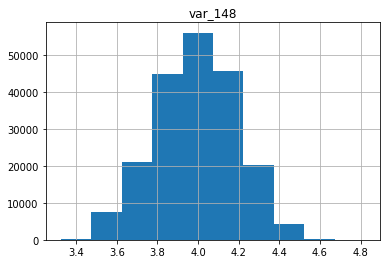

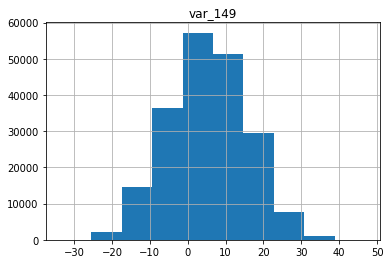

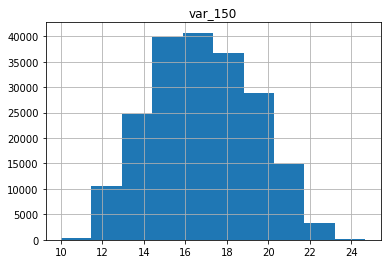

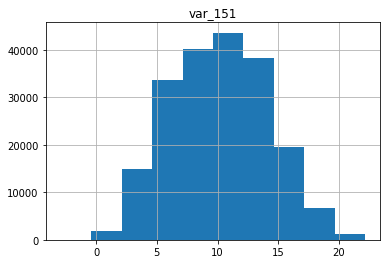

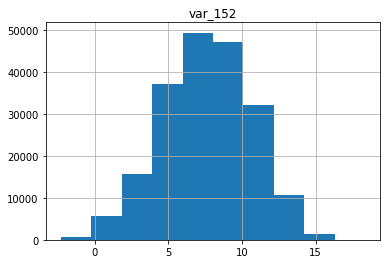

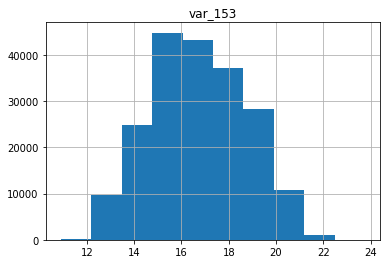

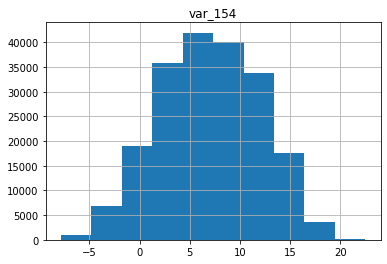

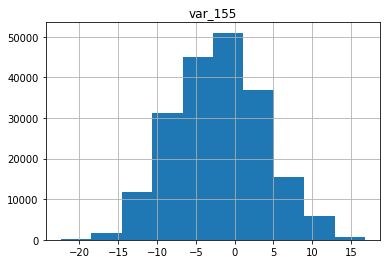

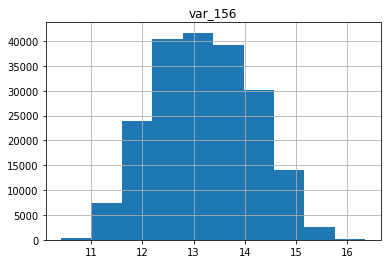

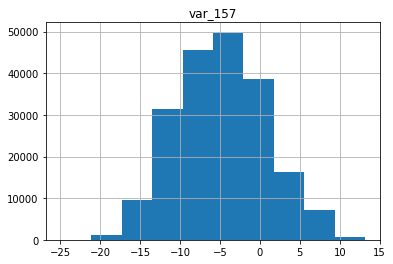

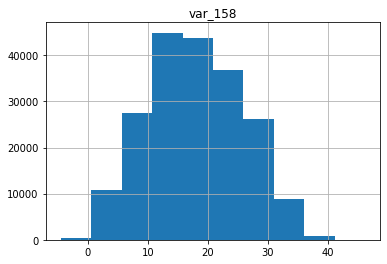

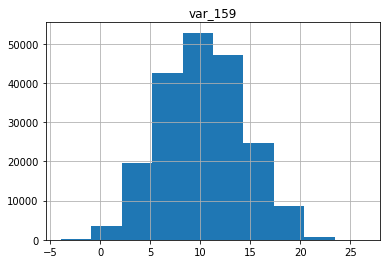

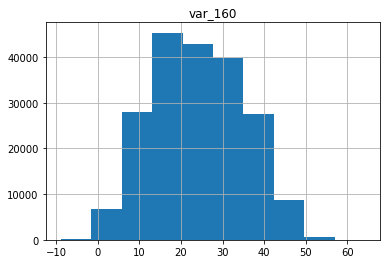

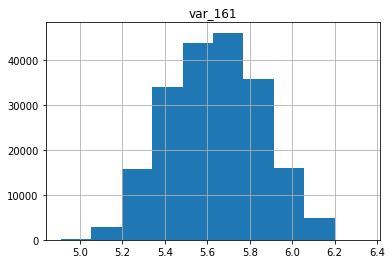

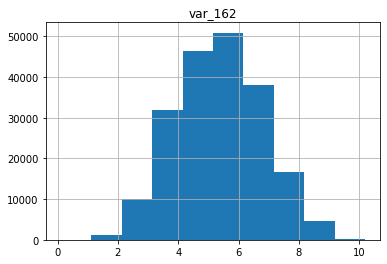

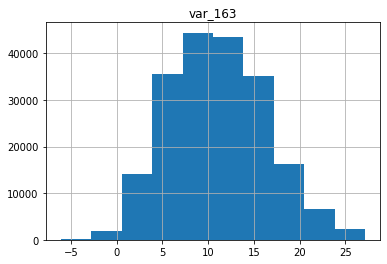

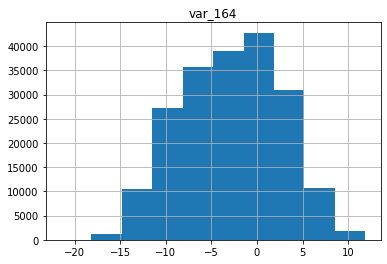

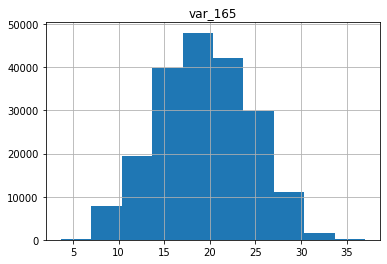

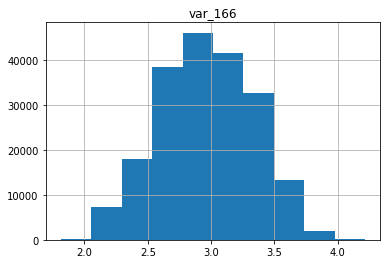

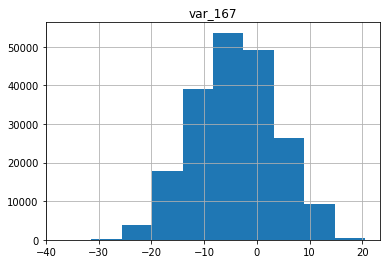

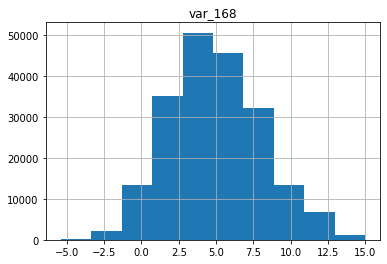

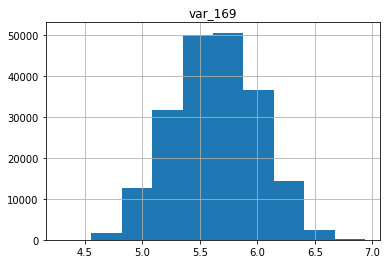

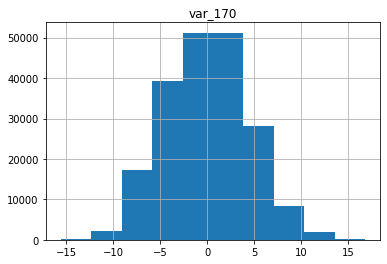

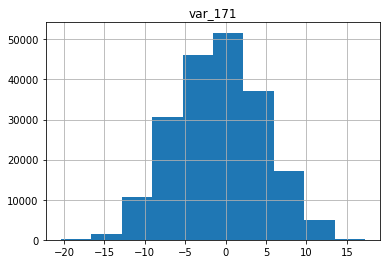

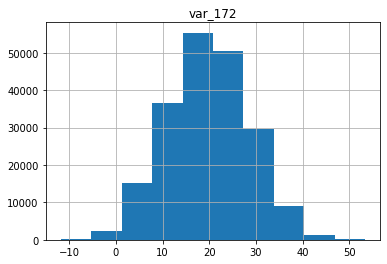

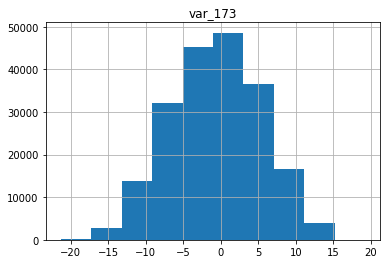

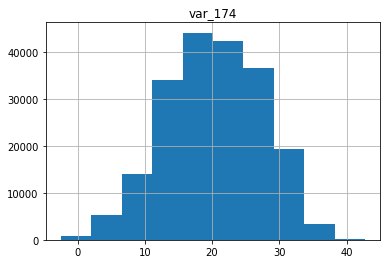

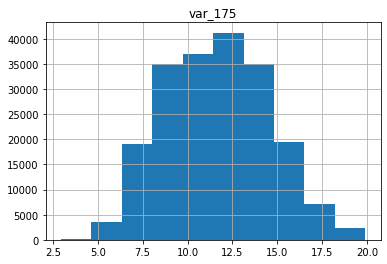

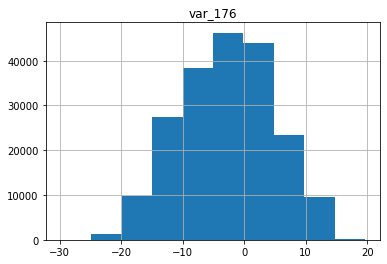

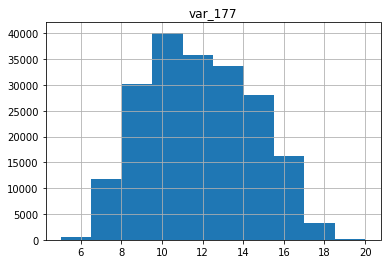

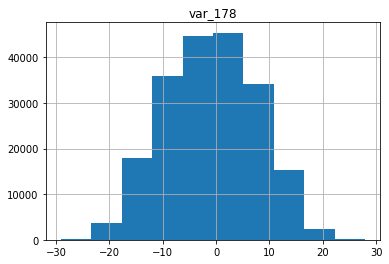

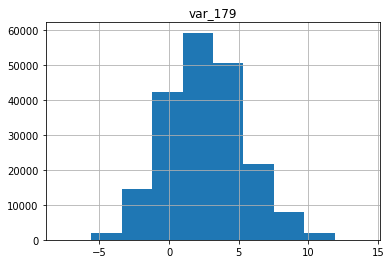

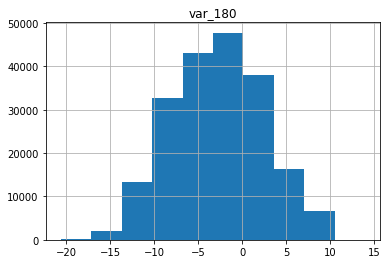

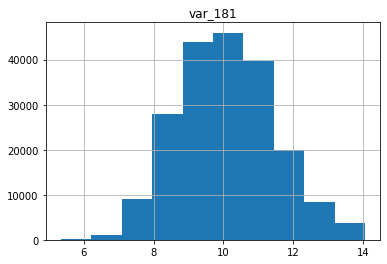

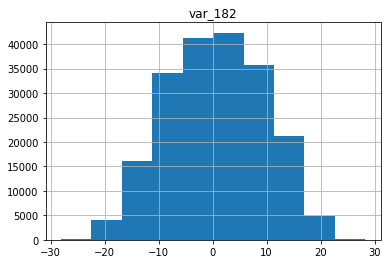

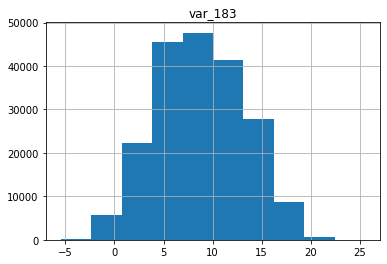

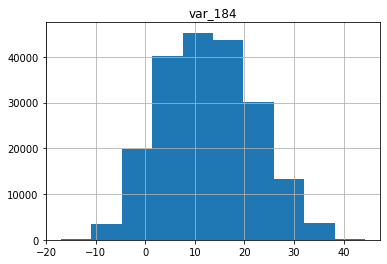

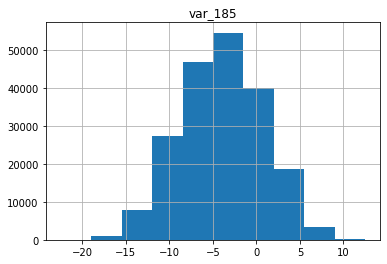

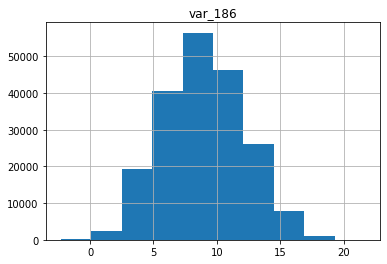

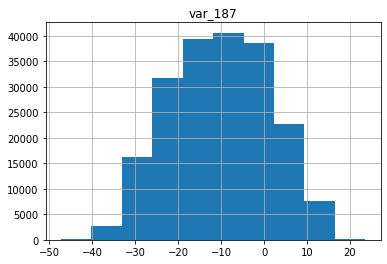

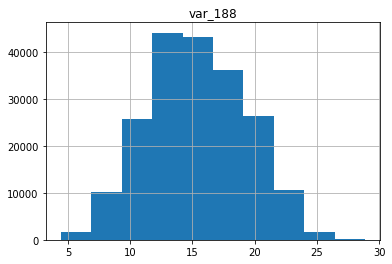

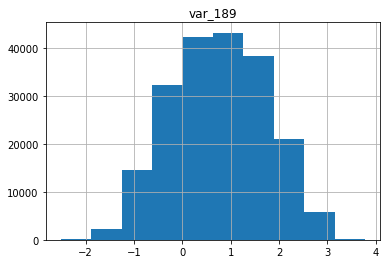

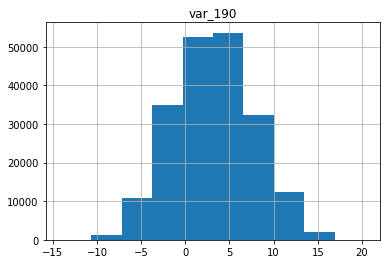

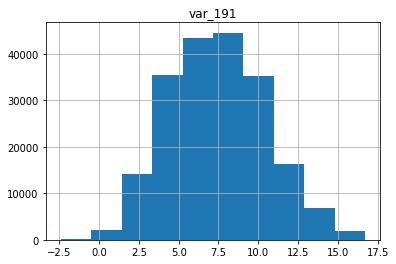

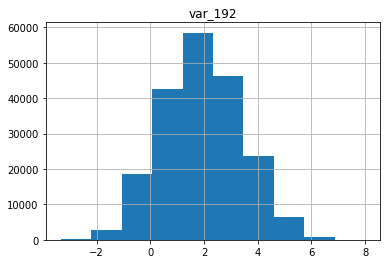

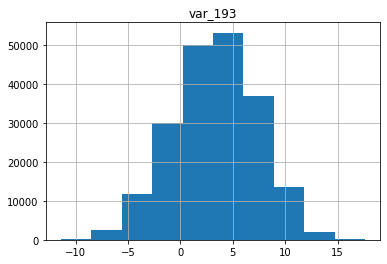

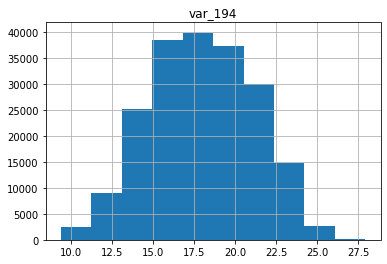

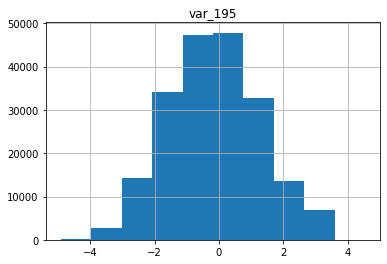

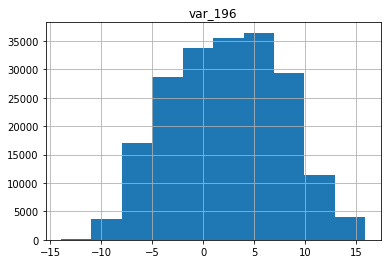

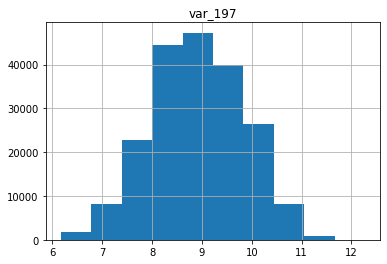

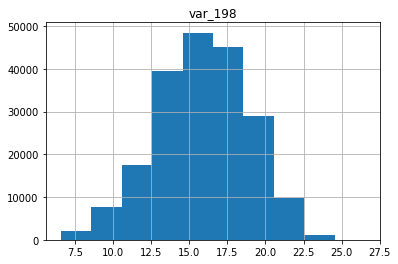

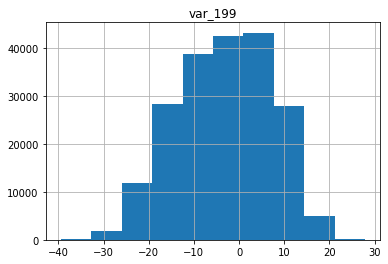

In [37]:
# show histograms of data columns
# select numerical features
train_num_columns = app_test.select_dtypes(include=['int64', 'float64']).columns
print('num_columns =', train_num_columns, '\n')
for col in train_num_columns:
  app_test.hist(col)
  plt.show();

In [0]:
# Let's plot the scatter plot for train and test set for a few of the features
def plot_feature_scatter(df1, df2, features):
    i = 0
    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(4,4,figsize=(14,14))

    for feature in features:
        i += 1
        plt.subplot(4,4,i)
        plt.scatter(df1[feature], df2[feature], marker='+')
        plt.xlabel(feature, fontsize=9)
    plt.show();

<Figure size 432x288 with 0 Axes>

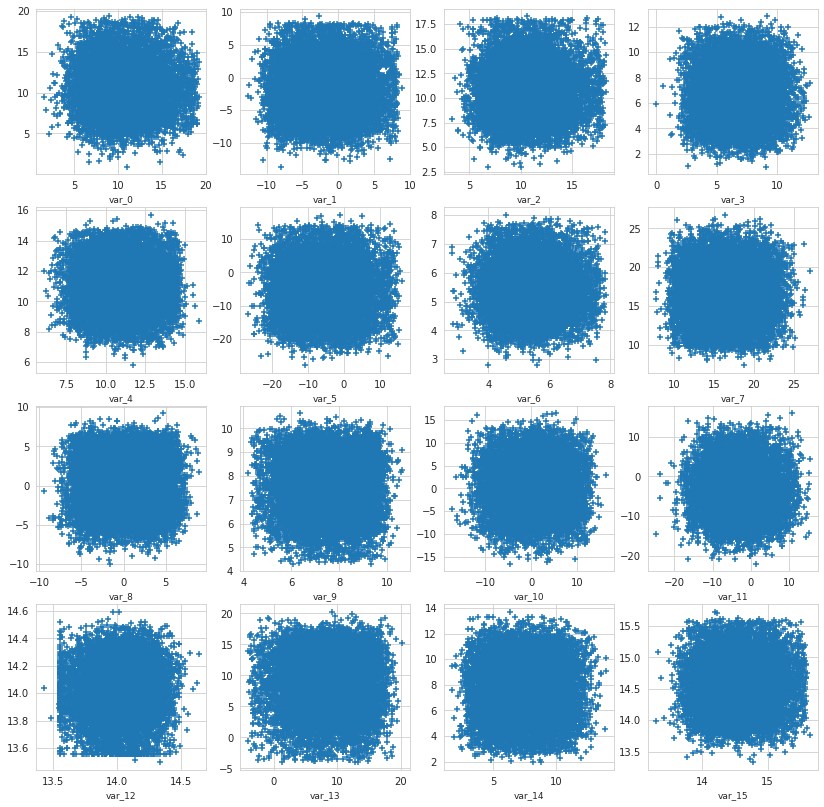

In [41]:
# We will show just 5% of the data. 
# On x axis we show train values and on the y axis we show the test values
features = ['var_0', 'var_1','var_2','var_3', 'var_4', 'var_5', 'var_6', 'var_7', 
           'var_8', 'var_9', 'var_10','var_11','var_12', 'var_13', 'var_14', 'var_15', 
           ]
plot_feature_scatter(app_train[::20],app_test[::20], features)

In [0]:
# Let's show now the density plot of variables in train dataset
def plot_feature_distribution(df1, df2, label1, label2, features):
    i = 0
    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(10,10,figsize=(18,22))

    for feature in features:
        i += 1
        plt.subplot(10,10,i)
        sns.distplot(df1[feature], hist=False,label=label1)
        sns.distplot(df2[feature], hist=False,label=label2)
        plt.xlabel(feature, fontsize=9)
        locs, labels = plt.xticks()
        plt.tick_params(axis='x', which='major', labelsize=6, pad=-6)
        plt.tick_params(axis='y', which='major', labelsize=6)
    plt.show();


<Figure size 432x288 with 0 Axes>

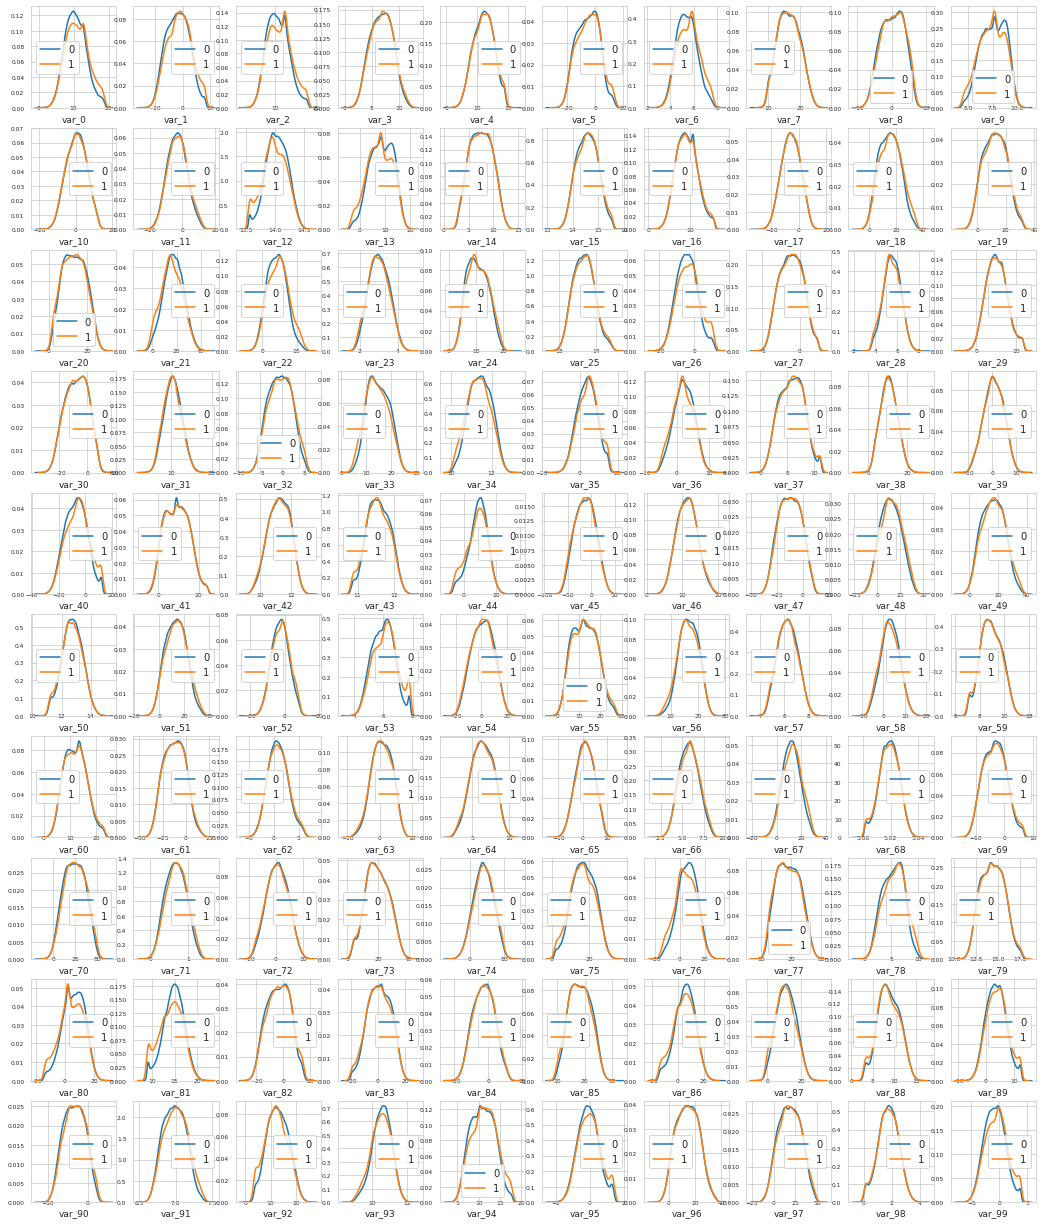

In [43]:
t0 = app_train.loc[app_train['target'] == 0]
t1 = app_train.loc[app_train['target'] == 1]
features = app_train.columns.values[2:102]
plot_feature_distribution(t0, t1, '0', '1', features)

<Figure size 432x288 with 0 Axes>

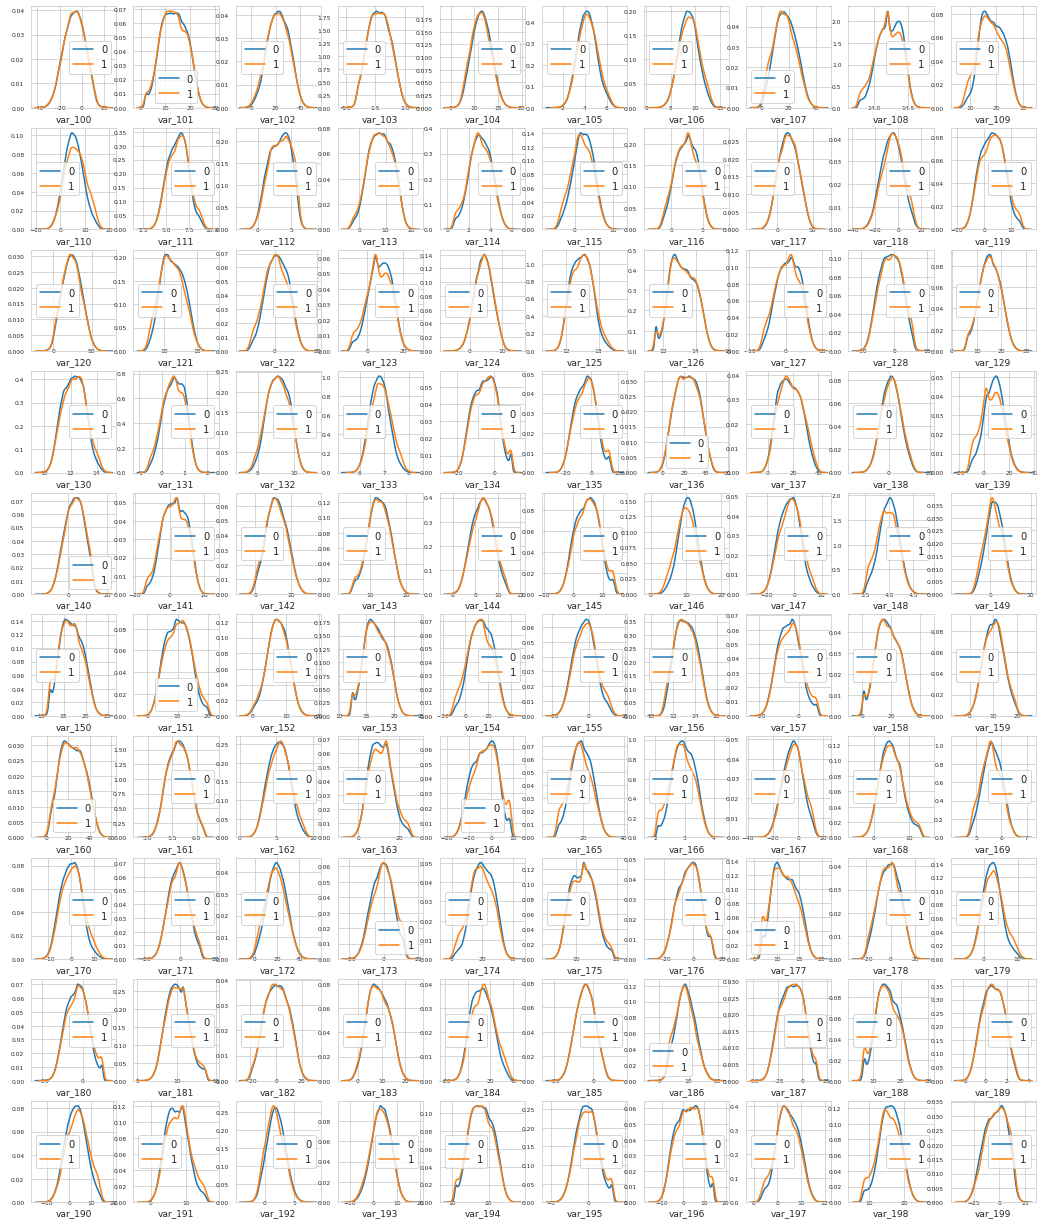

In [45]:
# The next 100 values are displayed in the following cell
features = app_train.columns.values[102:202]
plot_feature_distribution(t0, t1, '0', '1', features)



We can observe that there is a considerable number of features with significant different distribution for the two target values.
For example, var_0, var_1, var_2, var_5, var_9, var_13, var_106, var_109, var_139 and many others.

Also some features, like var_2, var_13, var_26, var_55, var_175, var_184, var_196 shows a distribution that resambles to a bivariate distribution.

We will take this into consideration in the future for the selection of the features for our prediction model.

<Figure size 432x288 with 0 Axes>

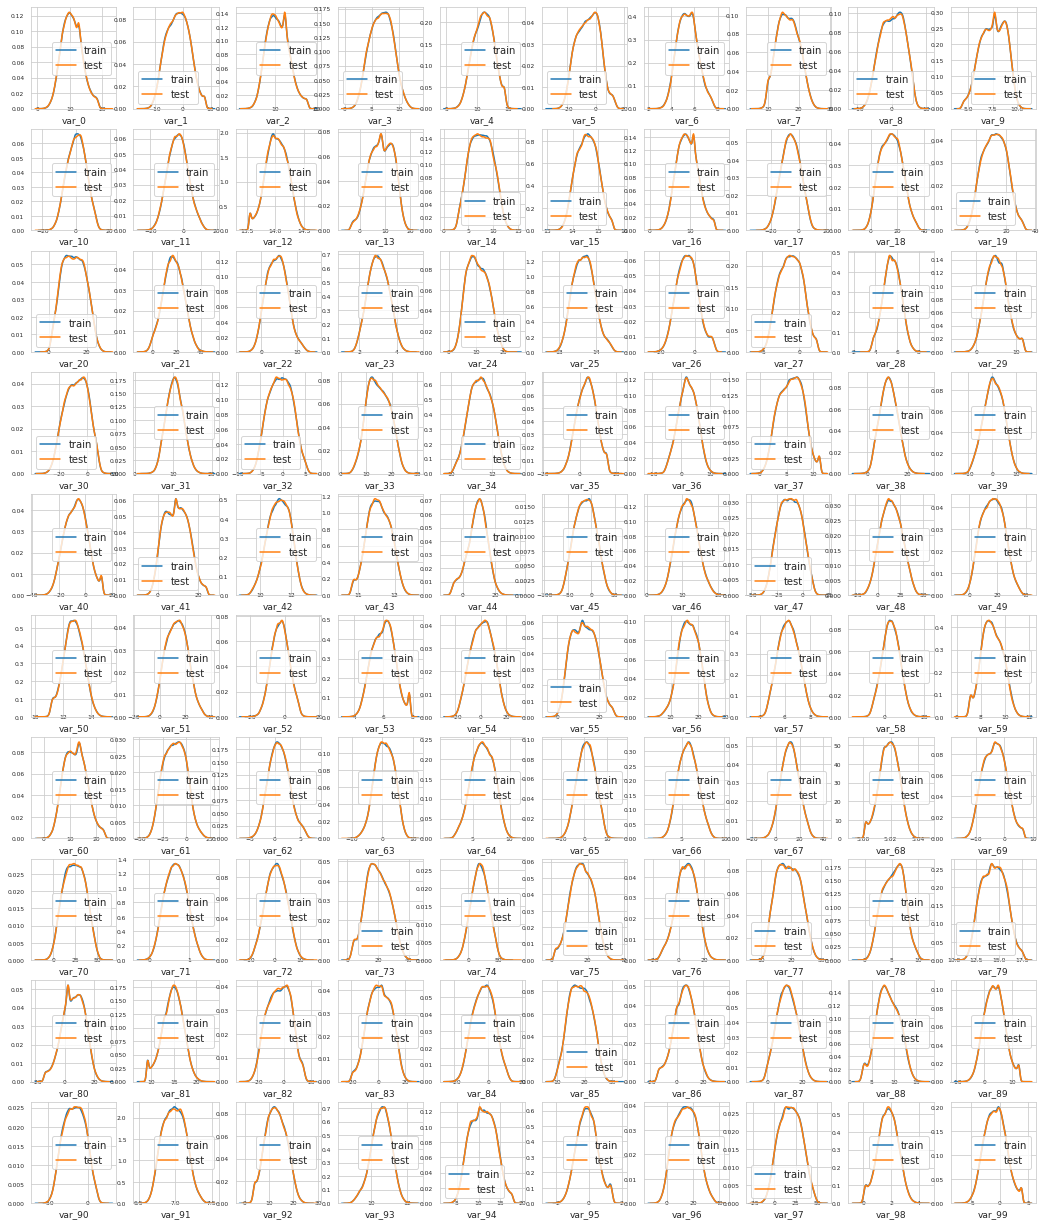

In [46]:
# Let's now look to the distribution of the same features in parallel in train and test datasets.
features = app_train.columns.values[2:102]
plot_feature_distribution(app_train, app_test, 'train', 'test', features)

<Figure size 432x288 with 0 Axes>

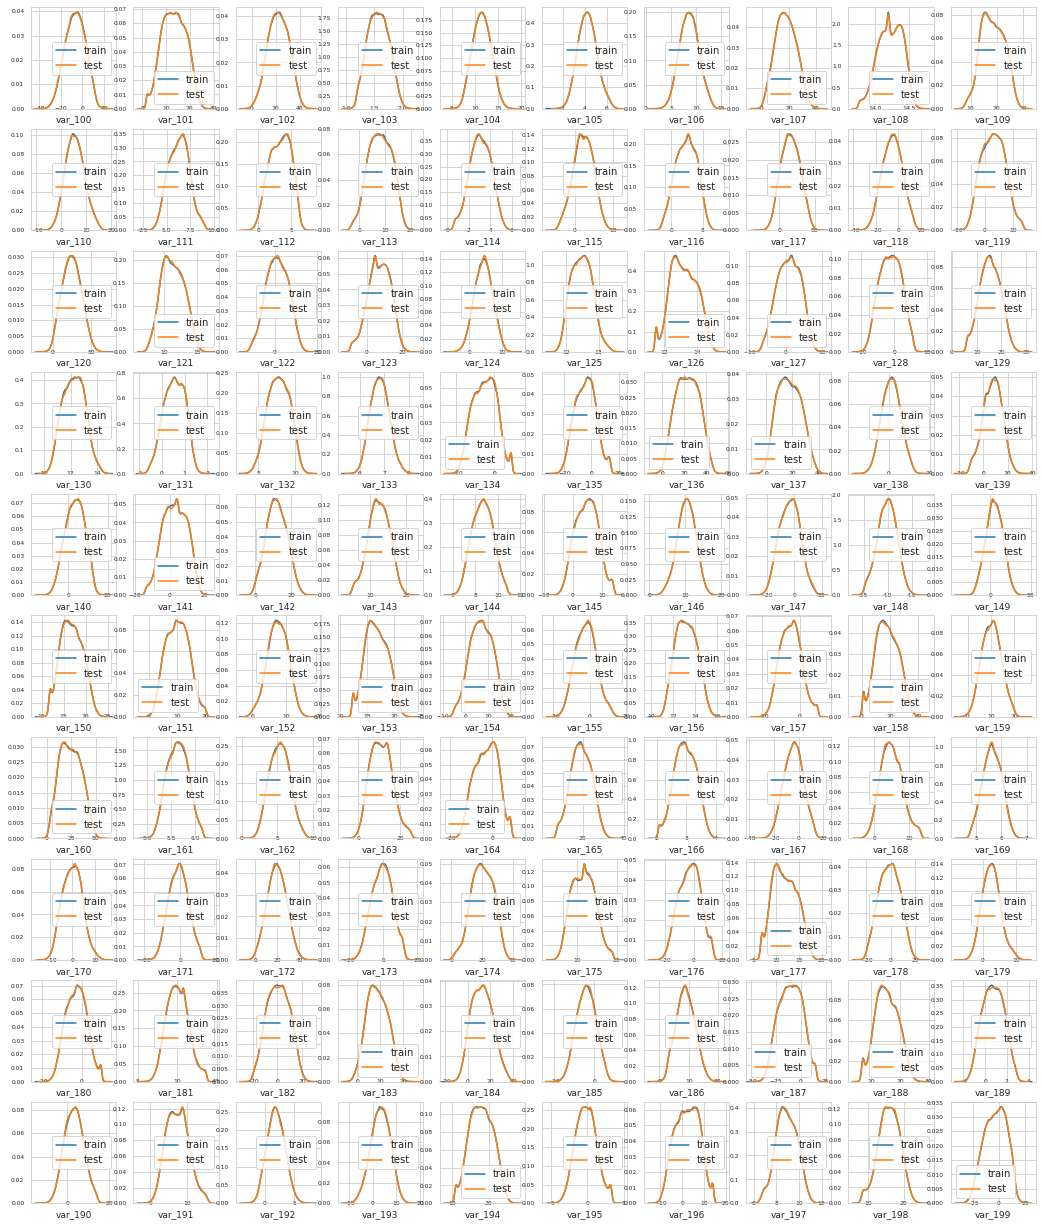

In [48]:
features = app_train.columns.values[102:202]
plot_feature_distribution(app_train, app_test, 'train', 'test', features)

The train and test seems to be well ballanced with respect with distribution of the numeric variables.

In [0]:
# Let's check the distribution of the mean values per row in the train and test set.




In [18]:
# Find correlations with the target and sort
correlations = app_train.corr()['target'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 var_179    0.048916
var_40     0.050281
var_164    0.050469
var_91     0.050469
var_53     0.052718
var_190    0.054430
var_99     0.054501
var_22     0.054825
var_151    0.058626
var_133    0.061227
var_2      0.061382
var_67     0.064815
var_1      0.072083
var_26     0.076517
target     1.000000
Name: target, dtype: float64

Most Negative Correlations:
 var_146   -0.073361
var_33    -0.064322
var_139   -0.063938
var_166   -0.063391
var_44    -0.062916
var_81    -0.059695
var_174   -0.059033
var_165   -0.056833
var_149   -0.054129
var_93    -0.053702
var_76    -0.052991
var_21    -0.051148
var_36    -0.050841
var_127   -0.050778
var_114   -0.050458
Name: target, dtype: float64
